<a href="https://colab.research.google.com/github/Parthi1212-dotcom/Investment-Portfolio-through-Evolutionary-algorithms/blob/main/Did_something_on_8th_Aug_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=c55d4c208954d5d4fb831f0f8ca93d8862c1e9201b066e09d564969a5bc3c5d6
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [3]:
# main.py
# Description: This script builds a large-scale dataset for all companies in the
# S&P 500 index. It scrapes the ticker list from Wikipedia, then fetches
# historical prices, fundamental data, and technical indicators for each stock.

# --- Prerequisites ---
# Before running, make sure you have the necessary libraries installed.
# You will also need 'lxml' for the Wikipedia scraping to work.
# pip install yfinance pandas ta lxml

import pandas as pd
import yfinance as yf
import ta
from datetime import datetime

# --- 1. Configuration & Helper Functions ---

def get_sp500_tickers():
    """
    Scrapes the Wikipedia page for the list of S&P 500 companies.
    Returns a list of stock tickers.
    """
    print("Fetching S&P 500 ticker list from Wikipedia...")
    try:
        # The table is the first one on the page
        url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
        table = pd.read_html(url)
        sp500_df = table[0]
        # The 'Symbol' column contains the tickers
        tickers = sp500_df['Symbol'].tolist()
        # Some symbols in Wikipedia are incorrect (e.g., 'BRK.B' should be 'BRK-B').
        # We'll perform a simple replacement.
        tickers = [s.replace('.', '-') for s in tickers]
        print(f"Successfully fetched {len(tickers)} tickers.")
        return tickers
    except Exception as e:
        print(f"Could not fetch S&P 500 tickers. Error: {e}")
        return []

def get_technical_indicators(df):
    """Calculates and adds technical indicators to the DataFrame."""
    df['SMA_20'] = ta.trend.sma_indicator(df['Close'], window=20)
    df['RSI_14'] = ta.momentum.rsi(df['Close'], window=14)
    df['MACD_diff'] = ta.trend.macd_diff(df['Close'])
    df['Daily_Return'] = df['Close'].pct_change()
    df['Volatility_10D'] = df['Daily_Return'].rolling(window=10).std()
    return df

def process_symbol(symbol, start_date, end_date):
    """
    Fetches all data for a single stock symbol, enriches it, and returns a DataFrame.
    """
    try:
        ticker_obj = yf.Ticker(symbol)
        info = ticker_obj.info
        market_cap = info.get('marketCap')

        # Filter out any stocks that might not have market cap data
        if not market_cap:
            return None

        hist_df = ticker_obj.history(start=start_date, end=end_date)
        if hist_df.empty:
            return None

        hist_df = get_technical_indicators(hist_df)
        hist_df.reset_index(inplace=True)

        cap_group = "Large" if market_cap >= 10e9 else ("Mid" if market_cap >= 2e9 else "Small")
        hist_df['Ticker'] = symbol
        hist_df['Company_Name'] = info.get('longName', 'N/A')
        hist_df['Market_Cap'] = market_cap
        hist_df['Cap_Type'] = cap_group
        hist_df['Sector'] = info.get('sector', 'N/A')
        hist_df['Industry'] = info.get('industry', 'N/A')
        hist_df['Country'] = info.get('country', 'N/A')
        hist_df['Beta'] = info.get('beta')
        hist_df['PE_Ratio'] = info.get('trailingPE')
        hist_df['Forward_PE'] = info.get('forwardPE')
        hist_df['Dividend_Yield'] = info.get('dividendYield')

        return hist_df

    except Exception:
        # This will catch various errors like invalid tickers or network issues
        return None

# --- 2. Main Execution ---

def build_sp500_dataset():
    """
    Main function to build the S&P 500 dataset.
    """
    all_symbols = get_sp500_tickers()
    if not all_symbols:
        print("Could not generate ticker list. Exiting.")
        return

    total_symbols = len(all_symbols)

    # Define date range
    end_date = datetime.now().strftime("%Y-%m-%d")
    start_date = "2016-01-01"

    all_data = []
    print(f"\n--- Fetching Data for {total_symbols} S&P 500 symbols ---")

    for i, sym in enumerate(all_symbols):
        # Provide progress update
        print(f"Processing symbol {i+1} of {total_symbols}: {sym}")

        # *** FIX IS HERE ***
        # Correctly pass the arguments positionally to match the function definition.
        df = process_symbol(sym, start_date, end_date)

        if df is not None:
            all_data.append(df)

    # --- 3. Save Final Dataset ---
    if all_data:
        print("\n--- Combining and Saving Final Dataset ---")
        full_df = pd.concat(all_data, ignore_index=True)

        full_df.dropna(subset=['SMA_20', 'RSI_14', 'Close'], inplace=True)

        file_name = "sp500_full_dataset.csv"
        full_df.to_csv(file_name, index=False)
        print(f"✅ Dataset saved successfully to '{file_name}'")
        print(f"Total rows in dataset: {len(full_df)}")
        print("\n--- Data Preview ---")
        print(full_df.head())
    else:
        print("\n⚠️ No data was collected. This could be due to network issues or API limits.")


if __name__ == '__main__':
    build_sp500_dataset()


Fetching S&P 500 ticker list from Wikipedia...
Successfully fetched 503 tickers.

--- Fetching Data for 503 S&P 500 symbols ---
Processing symbol 1 of 503: MMM
Processing symbol 2 of 503: AOS
Processing symbol 3 of 503: ABT
Processing symbol 4 of 503: ABBV
Processing symbol 5 of 503: ACN
Processing symbol 6 of 503: ADBE
Processing symbol 7 of 503: AMD
Processing symbol 8 of 503: AES
Processing symbol 9 of 503: AFL
Processing symbol 10 of 503: A
Processing symbol 11 of 503: APD
Processing symbol 12 of 503: ABNB
Processing symbol 13 of 503: AKAM
Processing symbol 14 of 503: ALB
Processing symbol 15 of 503: ARE
Processing symbol 16 of 503: ALGN
Processing symbol 17 of 503: ALLE
Processing symbol 18 of 503: LNT
Processing symbol 19 of 503: ALL
Processing symbol 20 of 503: GOOGL
Processing symbol 21 of 503: GOOG
Processing symbol 22 of 503: MO
Processing symbol 23 of 503: AMZN
Processing symbol 24 of 503: AMCR
Processing symbol 25 of 503: AEE
Processing symbol 26 of 503: AEP
Processing symb

/tmp/ipython-input-146270313.py:122: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_df = pd.concat(all_data, ignore_index=True)


✅ Dataset saved successfully to 'sp500_full_dataset.csv'
Total rows in dataset: 1175135

--- Data Preview ---
                        Date       Open       High        Low      Close  \
19 2016-02-01 00:00:00-05:00  90.585157  90.864201  89.839026  90.221191   
20 2016-02-02 00:00:00-05:00  89.529649  89.948213  88.595472  89.699501   
21 2016-02-03 00:00:00-05:00  90.603357  92.720428  90.360712  92.520248   
22 2016-02-04 00:00:00-05:00  92.459615  93.648565  92.071384  93.078354   
23 2016-02-05 00:00:00-05:00  92.932749  93.345241  92.095626  93.096535   

     Volume  Dividends  Stock Splits     SMA_20     RSI_14  ...  Company_Name  \
19  3230994        0.0           0.0  86.372859  61.526933  ...    3M Company   
20  4283833        0.0           0.0  86.404706  59.109706  ...    3M Company   
21  6897093        0.0           0.0  86.558177  66.722425  ...    3M Company   
22  4136246        0.0           0.0  86.829636  67.992159  ...    3M Company   
23  4028726        0.0      

In [5]:
df = pd.read_csv('sp500_full_dataset.csv')
df.head()

Date       Open       High        Low      Close  \
0  2016-02-01 00:00:00-05:00  90.585149  90.864194  89.839019  90.221184   
1  2016-02-02 00:00:00-05:00  89.529664  89.948228  88.595487  89.699516   
2  2016-02-03 00:00:00-05:00  90.603327  92.720397  90.360682  92.520218   
3  2016-02-04 00:00:00-05:00  92.459585  93.648535  92.071354  93.078323   
4  2016-02-05 00:00:00-05:00  92.932741  93.345234  92.095618  93.096527   

    Volume  Dividends  Stock Splits     SMA_20     RSI_14  ...  Company_Name  \
0  3230994        0.0           0.0  86.372863  61.526896  ...    3M Company   
1  4283833        0.0           0.0  86.404710  59.109772  ...    3M Company   
2  6897093        0.0           0.0  86.558182  66.722391  ...    3M Company   
3  4136246        0.0           0.0  86.829640  67.992132  ...    3M Company   
4  4028726        0.0           0.0  87.208770  68.034974  ...    3M Company   

    Market_Cap  Cap_Type       Sector       Industry        Country   Beta  \
0  80299294720     Large  Industrials  Conglomerates  United States  1.104   
1  80299294720     Large  Industrials  Conglomerates  United States  1.104   
2  80299294720     Large  Industrials  Conglomerates  United States  1.104   
3  80299294720     Large  Industrials  Conglomerates  United States  1.104   
4  80299294720     Large  Industrials  Conglomerates  United States  1.104   

   PE_Ratio Forward_PE Dividend_Yield  
0  20.96801  19.083544           1.94  
1  20.96801  19.083544           1.94  
2  20.96801  19.083544           1.94  
3  20.96801  19.083544           1.94  
4  20.96801  19.083544           1.94  

[5 rows x 24 columns]

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'SMA_20', 'RSI_14', 'MACD_diff', 'Daily_Return',
       'Volatility_10D', 'Ticker', 'Company_Name', 'Market_Cap', 'Cap_Type',
       'Sector', 'Industry', 'Country', 'Beta', 'PE_Ratio', 'Forward_PE',
       'Dividend_Yield'],
      dtype='object')

In [8]:
def rsi_strategy(df):
    df = df.copy()
    df['Signal'] = 0
    df.loc[df['RSI_14'] < 30, 'Signal'] = 1  # Buy
    df.loc[df['RSI_14'] > 70, 'Signal'] = -1  # Sell
    df['RSI_Strategy_Return'] = df['Signal'].shift(1) * df['Daily_Return']
    return df

rsi_df = df.groupby('Ticker').apply(rsi_strategy)


/tmp/ipython-input-2025192249.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rsi_df = df.groupby('Ticker').apply(rsi_strategy)


In [9]:
rsi_df

Date        Open        High         Low  \
Ticker                                                                          
A      21537    2016-02-01 00:00:00-05:00   34.634932   35.172484   34.292013   
       21538    2016-02-02 00:00:00-05:00   34.458841   34.801761   34.245675   
       21539    2016-02-03 00:00:00-05:00   34.542252   34.625665   33.633977   
       21540    2016-02-04 00:00:00-05:00   34.431042   35.024201   34.264216   
       21541    2016-02-05 00:00:00-05:00   34.532986   34.579330   33.207649   
...                                   ...         ...         ...         ...   
ZTS    1172234  2025-07-31 00:00:00-04:00  148.000000  148.779999  145.309998   
       1172235  2025-08-01 00:00:00-04:00  146.179993  147.789993  145.100006   
       1172236  2025-08-04 00:00:00-04:00  151.250000  152.589996  148.759995   
       1172237  2025-08-05 00:00:00-04:00  160.050003  160.050003  144.509995   
       1172238  2025-08-06 00:00:00-04:00  146.199997  147.300003  144.250000   

                     Close   Volume  Dividends  Stock Splits      SMA_20  \
Ticker                                                                     
A      21537     34.931511  2666200        0.0           0.0   35.244775   
       21538     34.356892  1742300        0.0           0.0   35.077022   
       21539     34.468105  2128100        0.0           0.0   34.921318   
       21540     34.681278  2833500        0.0           0.0   34.767931   
       21541     33.402279  4424600        0.0           0.0   34.630763   
...                    ...      ...        ...           ...         ...   
ZTS    1172234  145.789993  4855300        0.0           0.0  152.643193   
       1172235  147.380005  3153100        0.0           0.0  152.079719   
       1172236  151.809998  6270800        0.0           0.0  151.843888   
       1172237  146.119995  7335300        0.0           0.0  151.286182   
       1172238  146.500000  4987500        0.0           0.0  150.724055   

                   RSI_14  ...  Cap_Type      Sector  \
Ticker                     ...                         
A      21537    43.622801  ...     Large  Healthcare   
       21538    39.084677  ...     Large  Healthcare   
       21539    40.377490  ...     Large  Healthcare   
       21540    42.879890  ...     Large  Healthcare   
       21541    33.732156  ...     Large  Healthcare   
...                   ...  ...       ...         ...   
ZTS    1172234  32.062690  ...     Large  Healthcare   
       1172235  36.787554  ...     Large  Healthcare   
       1172236  47.700996  ...     Large  Healthcare   
       1172237  38.505485  ...     Large  Healthcare   
       1172238  39.346427  ...     Large  Healthcare   

                                                Industry        Country  \
Ticker                                                                    
A      21537                      Diagnostics & Research  United States   
       21538                      Diagnostics & Research  United States   
       21539                      Diagnostics & Research  United States   
       21540                      Diagnostics & Research  United States   
       21541                      Diagnostics & Research  United States   
...                                                  ...            ...   
ZTS    1172234  Drug Manufacturers - Specialty & Generic  United States   
       1172235  Drug Manufacturers - Specialty & Generic  United States   
       1172236  Drug Manufacturers - Specialty & Generic  United States   
       1172237  Drug Manufacturers - Specialty & Generic  United States   
       1172238  Drug Manufacturers - Specialty & Generic  United States   

                 Beta   PE_Ratio Forward_PE Dividend_Yield Signal  \
Ticker                                                              
A      21537    1.219  27.986454  20.110619           0.88      0   
       21538    1.219  27.986454  20.110619           0.88      0   
       21539 

In [10]:
def macd_strategy(df):
    df = df.copy()
    df['Signal'] = 0
    df.loc[df['MACD_diff'] > 0, 'Signal'] = 1
    df.loc[df['MACD_diff'] < 0, 'Signal'] = -1
    df['MACD_Strategy_Return'] = df['Signal'].shift(1) * df['Daily_Return']
    return df

macd_df = df.groupby('Ticker').apply(macd_strategy)


/tmp/ipython-input-785023550.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  macd_df = df.groupby('Ticker').apply(macd_strategy)


In [11]:
macd_df

Date        Open        High         Low  \
Ticker                                                                          
A      21537    2016-02-01 00:00:00-05:00   34.634932   35.172484   34.292013   
       21538    2016-02-02 00:00:00-05:00   34.458841   34.801761   34.245675   
       21539    2016-02-03 00:00:00-05:00   34.542252   34.625665   33.633977   
       21540    2016-02-04 00:00:00-05:00   34.431042   35.024201   34.264216   
       21541    2016-02-05 00:00:00-05:00   34.532986   34.579330   33.207649   
...                                   ...         ...         ...         ...   
ZTS    1172234  2025-07-31 00:00:00-04:00  148.000000  148.779999  145.309998   
       1172235  2025-08-01 00:00:00-04:00  146.179993  147.789993  145.100006   
       1172236  2025-08-04 00:00:00-04:00  151.250000  152.589996  148.759995   
       1172237  2025-08-05 00:00:00-04:00  160.050003  160.050003  144.509995   
       1172238  2025-08-06 00:00:00-04:00  146.199997  147.300003  144.250000   

                     Close   Volume  Dividends  Stock Splits      SMA_20  \
Ticker                                                                     
A      21537     34.931511  2666200        0.0           0.0   35.244775   
       21538     34.356892  1742300        0.0           0.0   35.077022   
       21539     34.468105  2128100        0.0           0.0   34.921318   
       21540     34.681278  2833500        0.0           0.0   34.767931   
       21541     33.402279  4424600        0.0           0.0   34.630763   
...                    ...      ...        ...           ...         ...   
ZTS    1172234  145.789993  4855300        0.0           0.0  152.643193   
       1172235  147.380005  3153100        0.0           0.0  152.079719   
       1172236  151.809998  6270800        0.0           0.0  151.843888   
       1172237  146.119995  7335300        0.0           0.0  151.286182   
       1172238  146.500000  4987500        0.0           0.0  150.724055   

                   RSI_14  ...  Cap_Type      Sector  \
Ticker                     ...                         
A      21537    43.622801  ...     Large  Healthcare   
       21538    39.084677  ...     Large  Healthcare   
       21539    40.377490  ...     Large  Healthcare   
       21540    42.879890  ...     Large  Healthcare   
       21541    33.732156  ...     Large  Healthcare   
...                   ...  ...       ...         ...   
ZTS    1172234  32.062690  ...     Large  Healthcare   
       1172235  36.787554  ...     Large  Healthcare   
       1172236  47.700996  ...     Large  Healthcare   
       1172237  38.505485  ...     Large  Healthcare   
       1172238  39.346427  ...     Large  Healthcare   

                                                Industry        Country  \
Ticker                                                                    
A      21537                      Diagnostics & Research  United States   
       21538                      Diagnostics & Research  United States   
       21539                      Diagnostics & Research  United States   
       21540                      Diagnostics & Research  United States   
       21541                      Diagnostics & Research  United States   
...                                                  ...            ...   
ZTS    1172234  Drug Manufacturers - Specialty & Generic  United States   
       1172235  Drug Manufacturers - Specialty & Generic  United States   
       1172236  Drug Manufacturers - Specialty & Generic  United States   
       1172237  Drug Manufacturers - Specialty & Generic  United States   
       1172238  Drug Manufacturers - Specialty & Generic  United States   

                 Beta   PE_Ratio Forward_PE Dividend_Yield Signal  \
Ticker                                                              
A      21537    1.219  27.986454  20.110619           0.88      0   
       21538    1.219  27.986454  20.110619           0.88      0   
       21539 

In [13]:
def sma_strategy(df):
    df = df.copy()
    df['Signal'] = 0
    df.loc[df['Close'] > df['SMA_20'], 'Signal'] = 1
    df.loc[df['Close'] < df['SMA_20'], 'Signal'] = -1
    df['SMA_Strategy_Return'] = df['Signal'].shift(1) * df['Daily_Return']
    return df

sma_df = df.groupby('Ticker').apply(sma_strategy)


/tmp/ipython-input-1374349193.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sma_df = df.groupby('Ticker').apply(sma_strategy)


File loaded. Analyzing factor performance...


/tmp/ipython-input-3329579574.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  factor_performance = data.groupby('Quantile')['Daily_Return_avg'].mean().sort_index()
/tmp/ipython-input-3329579574.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=annualized_performance_pct.index, y=annualized_performance_pct.values, palette='viridis')



--- Factor Performance Results ---
Factor Analyzed: PE_Ratio

Average Annualized Return by Quantile (%):
Quantile
Q1   14.44%
Q2   15.54%
Q3   16.81%
Q4   21.23%
Q5   26.04%

(Q1 represents stocks with the lowest factor value)
----------------------------------



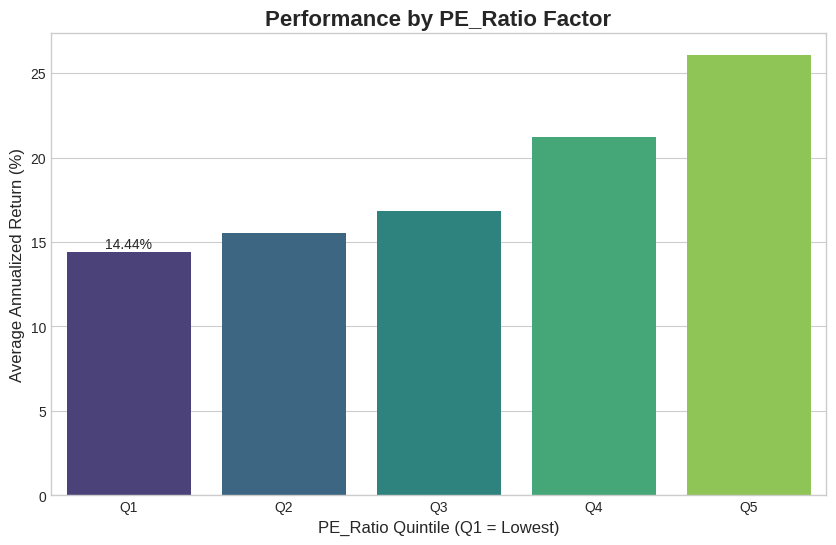

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Configuration ---
# IMPORTANT: Replace with your dataset's filename
FILE_NAME = '/content/sp500_full_dataset.csv'

# Define the factor you want to test.
# Try changing this to 'Market_Cap', 'Volatility_10D', or 'Beta' later!
FACTOR_COLUMN = 'PE_Ratio'

# Set the number of groups (quantiles) to divide the stocks into. 5 is standard (quintiles).
NUM_QUANTILES = 5

# --- Step 2: Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME)
    print("File loaded. Analyzing factor performance...")
except FileNotFoundError:
    print(f"Error: Make sure '{FILE_NAME}' is in the same folder as the script.")
    exit()

# For this analysis, we'll look at the average return for each stock over its history
# and its most recent factor value.
avg_returns = df.groupby('Ticker')['Daily_Return'].mean().reset_index()
latest_data = df.sort_values('Date').drop_duplicates('Ticker', keep='last')

# Merge the average returns with the latest company data
data = pd.merge(latest_data, avg_returns, on='Ticker', suffixes=('_latest', '_avg'))

# --- Step 3: Create Factor Quantiles ---
# Drop rows where the factor data is missing or invalid
# For P/E ratio, negative values are not meaningful, so we remove them
if FACTOR_COLUMN == 'PE_Ratio':
    data = data[data[FACTOR_COLUMN] > 0]
data = data.dropna(subset=[FACTOR_COLUMN])

# Create labels for our groups (Q1 = lowest, Q5 = highest)
quantile_labels = [f'Q{i+1}' for i in range(NUM_QUANTILES)]

# Cut the data into quantiles based on the factor column
data['Quantile'] = pd.qcut(data[FACTOR_COLUMN],
                           q=NUM_QUANTILES,
                           labels=quantile_labels,
                           duplicates='drop') # Handles cases with non-unique factor values

# --- Step 4: Calculate Performance of Each Quantile ---
# Group by the new 'Quantile' column and calculate the average of the historical daily returns
factor_performance = data.groupby('Quantile')['Daily_Return_avg'].mean().sort_index()

# Convert to an annualized percentage for easier interpretation (approx. 252 trading days)
annualized_performance_pct = factor_performance * 252 * 100

# --- Step 5: Display and Visualize the Results ---
print("\n--- Factor Performance Results ---")
print(f"Factor Analyzed: {FACTOR_COLUMN}")
print("\nAverage Annualized Return by Quantile (%):")
print(annualized_performance_pct.to_string(float_format='%.2f%%'))
print("\n(Q1 represents stocks with the lowest factor value)")
print("----------------------------------\n")

# Visualize the results
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=annualized_performance_pct.index, y=annualized_performance_pct.values, palette='viridis')

# Add titles and labels
plt.title(f'Performance by {FACTOR_COLUMN} Factor', fontsize=16, fontweight='bold')
plt.xlabel(f'{FACTOR_COLUMN} Quintile (Q1 = Lowest)', fontsize=12)
plt.ylabel('Average Annualized Return (%)', fontsize=12)
ax.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=10) # Add labels to bars
plt.show()

Q1 represents the 20% of stocks with the lowest P/E ratios (the "cheapest" stocks).

Q5 represents the 20% of stocks with the highest P/E ratios (the "most expensive" stocks).

In [18]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'SMA_20', 'RSI_14', 'MACD_diff', 'Daily_Return',
       'Volatility_10D', 'Ticker', 'Company_Name', 'Market_Cap', 'Cap_Type',
       'Sector', 'Industry', 'Country', 'Beta', 'PE_Ratio', 'Forward_PE',
       'Dividend_Yield'],
      dtype='object')

In [20]:
# project1_drilldown.py
import pandas as pd
import plotly.express as px

# --- Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'

try:
    df = pd.read_csv(FILE_NAME)
    print("File loaded. Analyzing industry performance...")
except FileNotFoundError:
    print(f"Error: Make sure '{FILE_NAME}' is in the same folder as the script.")
    exit()

# --- Analysis ---
# Group by both Sector and Industry and calculate the average daily return
industry_performance = df.groupby(['Sector', 'Industry'])['Daily_Return'].mean().reset_index()

# Annualize the return (approximating 252 trading days a year)
industry_performance['Annualized_Return_Pct'] = industry_performance['Daily_Return'] * 252 * 100

# Drop any rows that don't have sector/industry info
industry_performance = industry_performance.dropna()

print("\n--- Top 10 Performing Industries ---")
print(industry_performance.sort_values('Annualized_Return_Pct', ascending=False).head(10).to_string(index=False))
print("\n------------------------------------")


# --- Visualization ---
print("Generating interactive treemap...")
fig = px.treemap(industry_performance,
                 path=[px.Constant("All Sectors"), 'Sector', 'Industry'], # Creates the hierarchy
                 values='Annualized_Return_Pct', # Determines the size of the box (can be changed to Market_Cap if desired)
                 color='Annualized_Return_Pct', # Determines the color
                 color_continuous_scale='RdYlGn', # Red-Yellow-Green color scale
                 title='Hierarchical Performance: Sector and Industry Annualized Returns (%)')

# Update hover data for clarity
fig.update_traces(hovertemplate='<b>%{label}</b><br>Annualized Return: %{color:.2f}%')

fig.show()

File loaded. Analyzing industry performance...

--- Top 10 Performing Industries ---
         Sector                                Industry  Daily_Return  Annualized_Return_Pct
      Utilities                   Utilities - Renewable      0.002753              69.384468
     Technology                                   Solar      0.001584              39.922187
    Industrials               Rental & Leasing Services      0.001574              39.659807
      Utilities Utilities - Independent Power Producers      0.001571              39.598590
Basic Materials                                  Copper      0.001464              36.902984
     Technology     Semiconductor Equipment & Materials      0.001355              34.140348
     Technology                       Computer Hardware      0.001352              34.069596
     Technology                          Semiconductors      0.001228              30.933532
    Industrials              Engineering & Construction      0.001142         

File loaded. Analyzing country risk vs. return...

--- Country Risk-Return Profiles ---
      Country  Annualized_Return_Pct  Annualized_Volatility_Pct
      Ireland              18.800205                  28.725337
United States              18.035946                  33.653290

----------------------------------
Generating risk-return scatter plot...


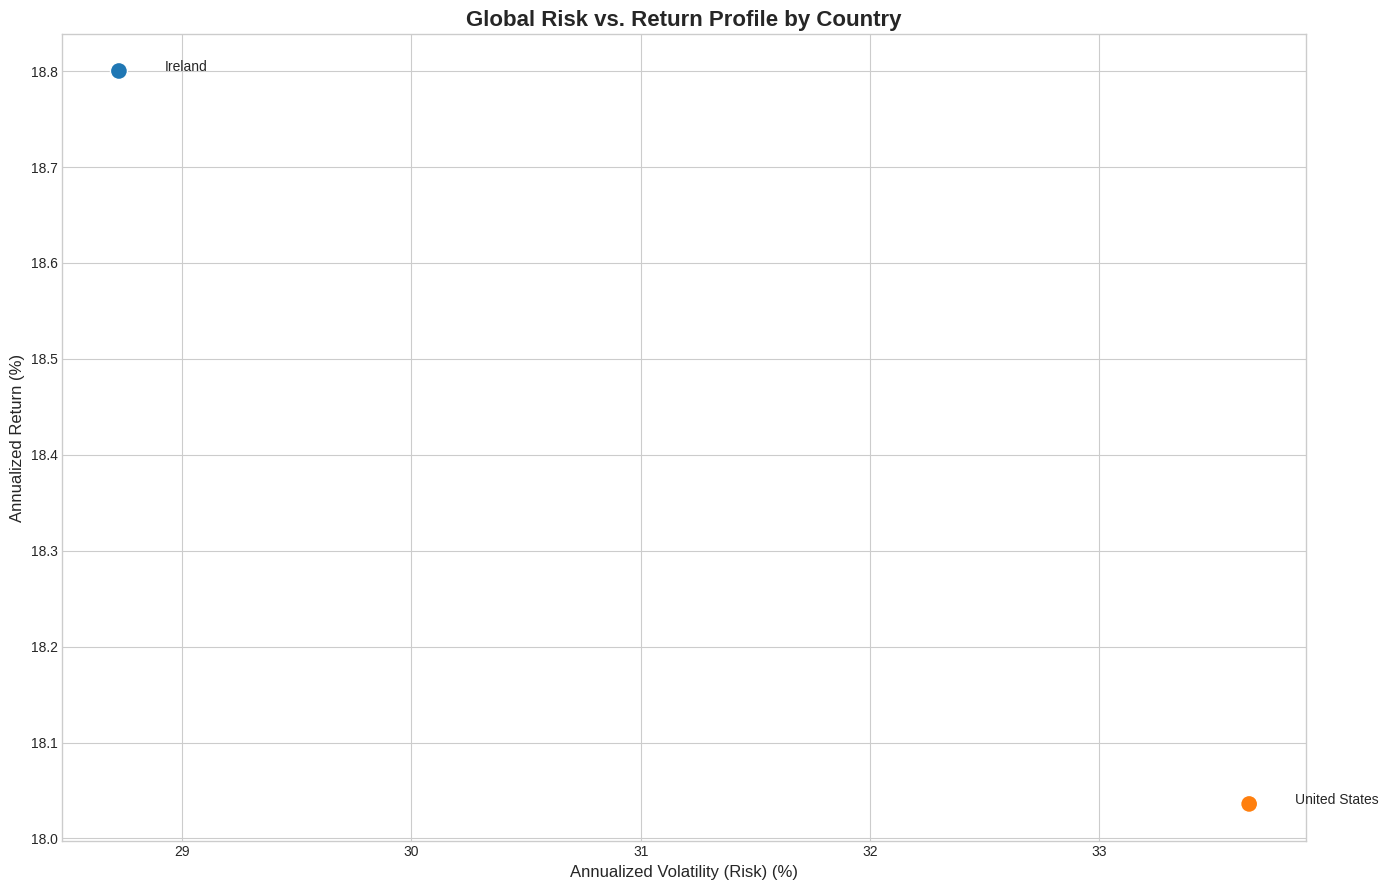

In [23]:
# project_country_analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# Minimum number of unique stocks for a country to be included in the analysis
MIN_STOCKS_PER_COUNTRY = 5

try:
    df = pd.read_csv(FILE_NAME)
    print("File loaded. Analyzing country risk vs. return...")
except FileNotFoundError:
    print(f"Error: Make sure '{FILE_NAME}' is in the same folder as the script.")
    exit()

# --- Analysis ---
# Filter out countries with too few stocks to be statistically significant
stock_counts = df.groupby('Country')['Ticker'].nunique()
valid_countries = stock_counts[stock_counts >= MIN_STOCKS_PER_COUNTRY].index
df_filtered = df[df['Country'].isin(valid_countries)]

# Group by country and calculate mean return and volatility
country_profile = df_filtered.groupby('Country')['Daily_Return'].agg(['mean', 'std']).reset_index()

# Annualize the metrics
TRADING_DAYS = 252
country_profile['Annualized_Return_Pct'] = country_profile['mean'] * TRADING_DAYS * 100
country_profile['Annualized_Volatility_Pct'] = country_profile['std'] * np.sqrt(TRADING_DAYS) * 100

print("\n--- Country Risk-Return Profiles ---")
print(country_profile[['Country', 'Annualized_Return_Pct', 'Annualized_Volatility_Pct']].to_string(index=False))
print("\n----------------------------------")

# --- Visualization ---
print("Generating risk-return scatter plot...")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 9))

ax = sns.scatterplot(data=country_profile,
                     x='Annualized_Volatility_Pct',
                     y='Annualized_Return_Pct',
                     hue='Country',
                     s=150,
                     legend=False)

# Add labels to each point for clarity
for i, row in country_profile.iterrows():
    ax.text(row['Annualized_Volatility_Pct'] + 0.2,
            row['Annualized_Return_Pct'],
            row['Country'],
            fontdict={'size': 10})

plt.title('Global Risk vs. Return Profile by Country', fontsize=16, fontweight='bold')
plt.xlabel('Annualized Volatility (Risk) (%)', fontsize=12)
plt.ylabel('Annualized Return (%)', fontsize=12)
plt.tight_layout()
plt.show()

#AAPL

/tmp/ipython-input-1831324818.py:16: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


File loaded. Analyzing rolling beta...
Generating plot...


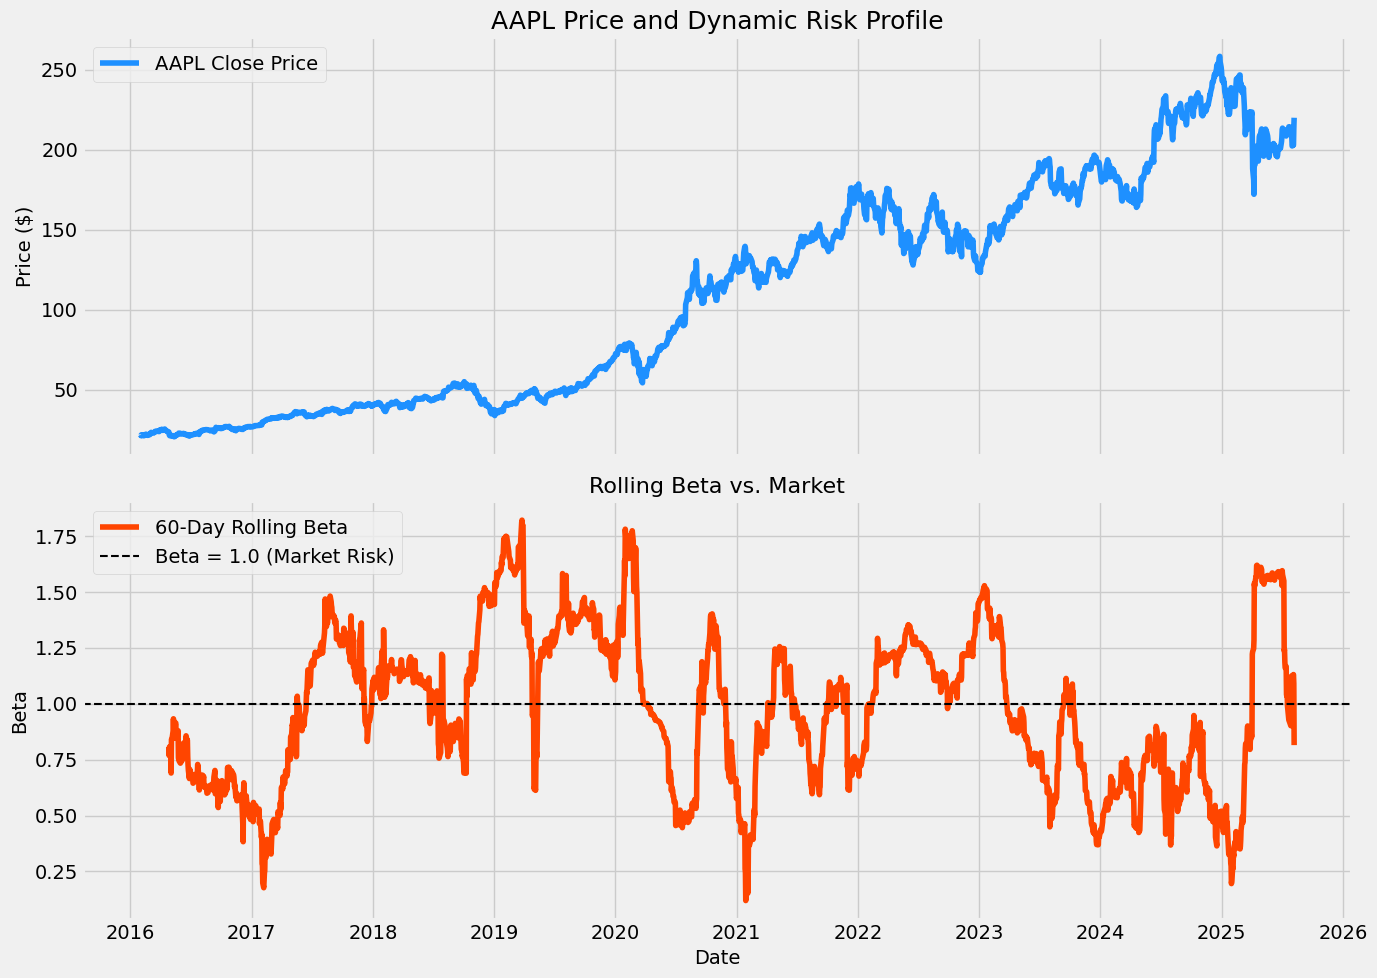

In [4]:
# rolling_beta_analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# IMPORTANT: Choose the ticker you want to analyze from your dataset.
TICKER_TO_ANALYZE = 'AAPL'
# Define the rolling window size (in days). 60 days is about 3 months.
WINDOW_SIZE = 60

# --- 2. Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    print("File loaded. Analyzing rolling beta...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 3. Calculate Market and Stock Returns ---
# Calculate market return (as an equal-weighted average of all stocks)
market_returns = df.groupby('Date')['Daily_Return'].mean()
market_returns.name = 'Market_Return'

# Isolate the data for the specific stock
stock_data = df[df['Ticker'] == TICKER_TO_ANALYZE].copy()

if stock_data.empty:
    print(f"Error: Ticker '{TICKER_TO_ANALYZE}' not found in the dataset. Please choose another.")
    exit()

# Combine stock and market returns into one DataFrame
combined_df = pd.concat([stock_data['Daily_Return'], market_returns], axis=1).dropna()
combined_df.columns = ['Stock_Return', 'Market_Return']


# --- 4. Calculate Rolling Beta ---
# Calculate rolling covariance of stock returns with market returns
rolling_cov = combined_df['Stock_Return'].rolling(window=WINDOW_SIZE).cov(combined_df['Market_Return'])

# Calculate rolling variance of market returns
rolling_var = combined_df['Market_Return'].rolling(window=WINDOW_SIZE).var()

# Calculate rolling beta
rolling_beta = rolling_cov / rolling_var
rolling_beta.name = f'{WINDOW_SIZE}-Day Rolling Beta'


# --- 5. Visualization ---
print("Generating plot...")
plt.style.use('fivethirtyeight')
# Create a figure with two subplots that share the same x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Stock Price (for context)
ax1.plot(stock_data['Close'], label=f'{TICKER_TO_ANALYZE} Close Price', color='dodgerblue')
ax1.set_title(f'{TICKER_TO_ANALYZE} Price and Dynamic Risk Profile', fontsize=18)
ax1.set_ylabel('Price ($)', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot 2: Rolling Beta
ax2.plot(rolling_beta.index, rolling_beta, label=rolling_beta.name, color='orangered')
# Add a reference line at Beta = 1.0 (market risk)
ax2.axhline(1.0, color='black', linestyle='--', linewidth=1.5, label='Beta = 1.0 (Market Risk)')
ax2.set_title(f'Rolling Beta vs. Market', fontsize=16)
ax2.set_ylabel('Beta', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
ax2.legend(loc='upper left')
ax2.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipython-input-412074398.py:16: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


File loaded. Analyzing dynamic risk profile...
Generating plot...


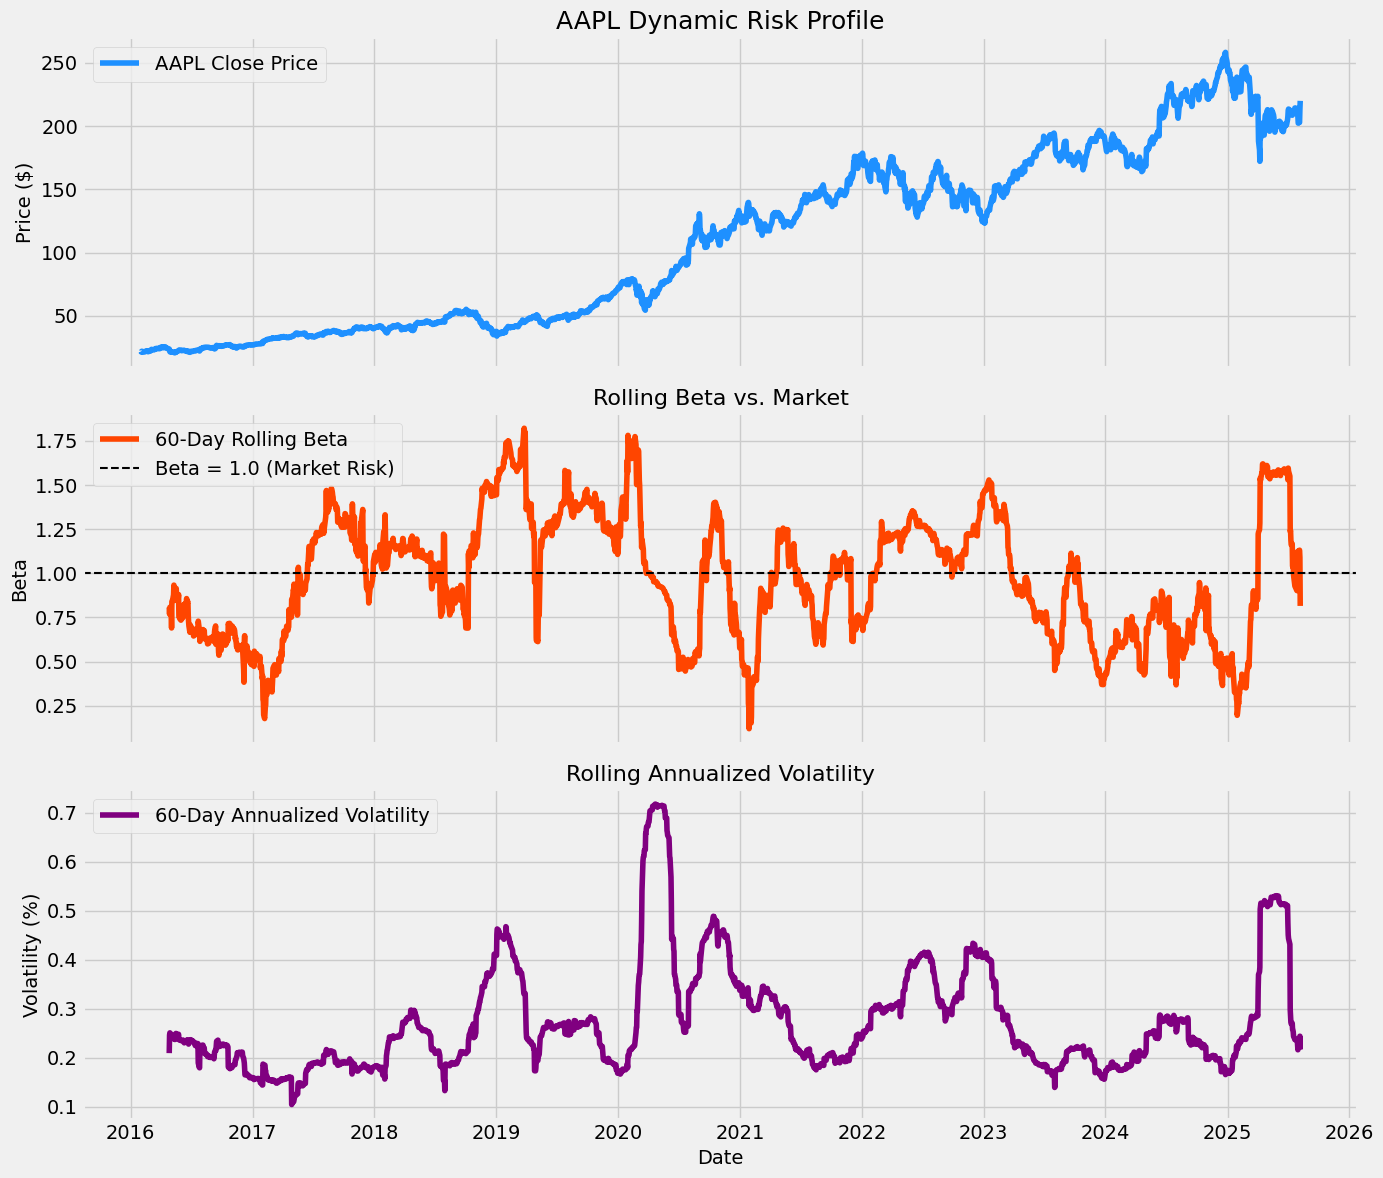

In [5]:
# rolling_risk_analysis_complete.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# IMPORTANT: Choose the ticker you want to analyze from your dataset.
TICKER_TO_ANALYZE = 'AAPL'
# Define the rolling window size (in days).
WINDOW_SIZE = 60

# --- 2. Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    print("File loaded. Analyzing dynamic risk profile...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 3. Calculate Market and Stock Returns ---
market_returns = df.groupby('Date')['Daily_Return'].mean()
market_returns.name = 'Market_Return'

stock_data = df[df['Ticker'] == TICKER_TO_ANALYZE].copy()
if stock_data.empty:
    print(f"Error: Ticker '{TICKER_TO_ANALYZE}' not found in the dataset. Please choose another.")
    exit()

combined_df = pd.concat([stock_data['Daily_Return'], market_returns], axis=1).dropna()
combined_df.columns = ['Stock_Return', 'Market_Return']

# --- 4. Calculate Rolling Risk Metrics ---
# Rolling Beta (Relative Risk)
rolling_cov = combined_df['Stock_Return'].rolling(window=WINDOW_SIZE).cov(combined_df['Market_Return'])
rolling_var = combined_df['Market_Return'].rolling(window=WINDOW_SIZE).var()
rolling_beta = rolling_cov / rolling_var
rolling_beta.name = f'{WINDOW_SIZE}-Day Rolling Beta'

# --- NEW: Calculate Rolling Volatility (Absolute Risk) ---
# We calculate the rolling standard deviation and annualize it.
rolling_vol = combined_df['Stock_Return'].rolling(window=WINDOW_SIZE).std() * np.sqrt(252)
rolling_vol.name = f'{WINDOW_SIZE}-Day Annualized Volatility'


# --- 5. Visualization ---
print("Generating plot...")
plt.style.use('fivethirtyeight')
# Create a figure with THREE subplots that share the same x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot 1: Stock Price (Context)
ax1.plot(stock_data['Close'], label=f'{TICKER_TO_ANALYZE} Close Price', color='dodgerblue')
ax1.set_title(f'{TICKER_TO_ANALYZE} Dynamic Risk Profile', fontsize=18)
ax1.set_ylabel('Price ($)', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot 2: Rolling Beta (Relative Risk)
ax2.plot(rolling_beta.index, rolling_beta, label=rolling_beta.name, color='orangered')
ax2.axhline(1.0, color='black', linestyle='--', linewidth=1.5, label='Beta = 1.0 (Market Risk)')
ax2.set_title(f'Rolling Beta vs. Market', fontsize=16)
ax2.set_ylabel('Beta', fontsize=14)
ax2.legend(loc='upper left')
ax2.grid(True)

# --- NEW: Plot 3: Rolling Volatility (Absolute Risk) ---
ax3.plot(rolling_vol.index, rolling_vol, label=rolling_vol.name, color='purple')
ax3.set_title(f'Rolling Annualized Volatility', fontsize=16)
ax3.set_ylabel('Volatility (%)', fontsize=14)
ax3.set_xlabel('Date', fontsize=14)
ax3.legend(loc='upper left')
ax3.grid(True)

plt.tight_layout()
plt.show()

#ADBE

/tmp/ipython-input-115459218.py:16: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


File loaded. Analyzing rolling beta...
Generating plot...


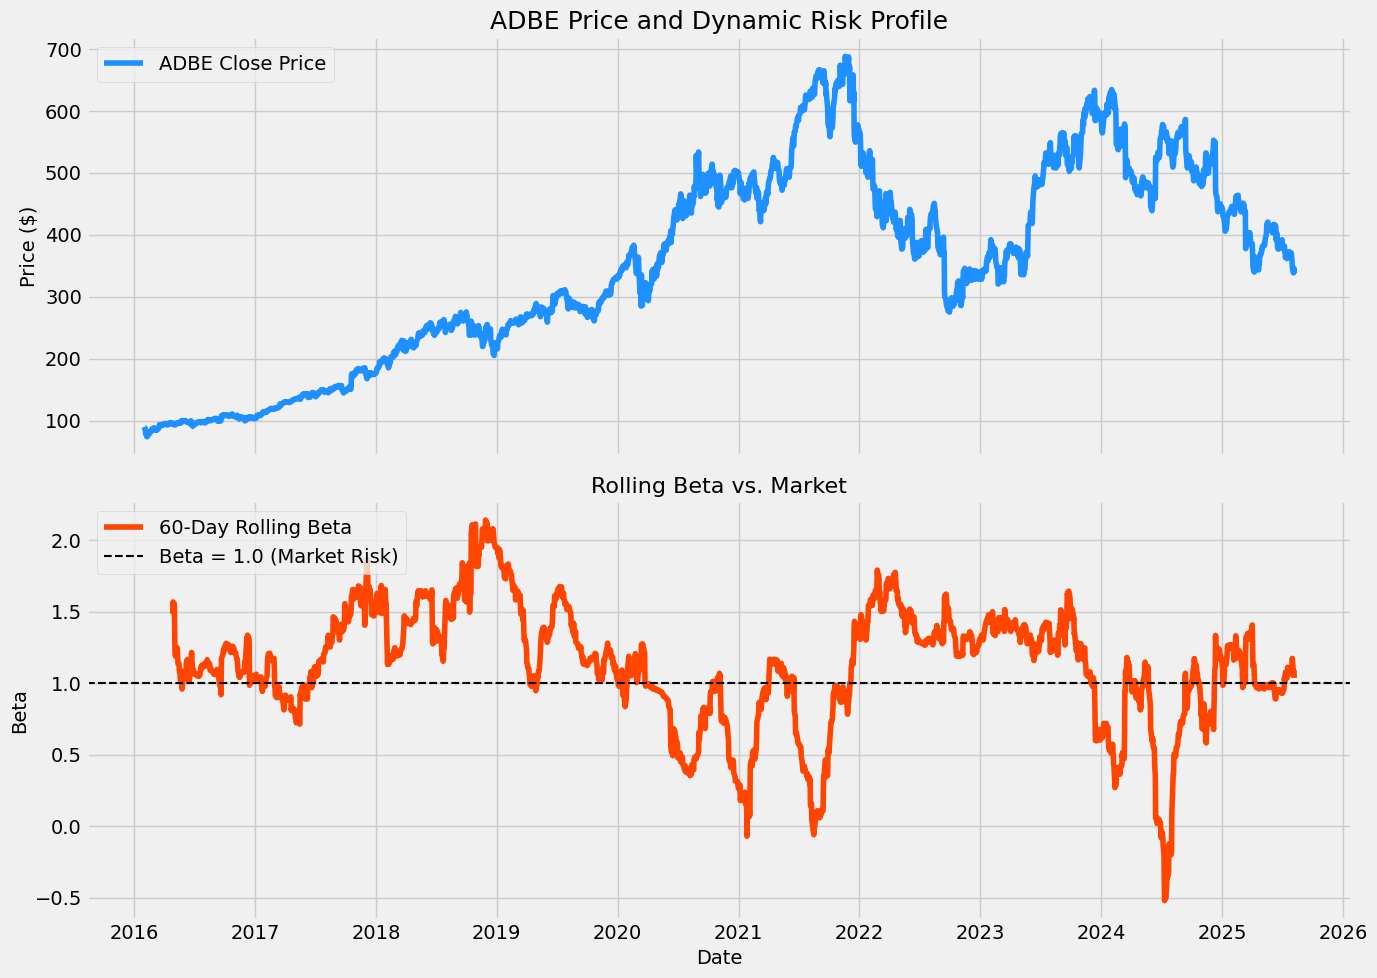

In [6]:
# rolling_beta_analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# IMPORTANT: Choose the ticker you want to analyze from your dataset.
TICKER_TO_ANALYZE = 'ADBE'
# Define the rolling window size (in days). 60 days is about 3 months.
WINDOW_SIZE = 60

# --- 2. Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    print("File loaded. Analyzing rolling beta...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 3. Calculate Market and Stock Returns ---
# Calculate market return (as an equal-weighted average of all stocks)
market_returns = df.groupby('Date')['Daily_Return'].mean()
market_returns.name = 'Market_Return'

# Isolate the data for the specific stock
stock_data = df[df['Ticker'] == TICKER_TO_ANALYZE].copy()

if stock_data.empty:
    print(f"Error: Ticker '{TICKER_TO_ANALYZE}' not found in the dataset. Please choose another.")
    exit()

# Combine stock and market returns into one DataFrame
combined_df = pd.concat([stock_data['Daily_Return'], market_returns], axis=1).dropna()
combined_df.columns = ['Stock_Return', 'Market_Return']


# --- 4. Calculate Rolling Beta ---
# Calculate rolling covariance of stock returns with market returns
rolling_cov = combined_df['Stock_Return'].rolling(window=WINDOW_SIZE).cov(combined_df['Market_Return'])

# Calculate rolling variance of market returns
rolling_var = combined_df['Market_Return'].rolling(window=WINDOW_SIZE).var()

# Calculate rolling beta
rolling_beta = rolling_cov / rolling_var
rolling_beta.name = f'{WINDOW_SIZE}-Day Rolling Beta'


# --- 5. Visualization ---
print("Generating plot...")
plt.style.use('fivethirtyeight')
# Create a figure with two subplots that share the same x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Stock Price (for context)
ax1.plot(stock_data['Close'], label=f'{TICKER_TO_ANALYZE} Close Price', color='dodgerblue')
ax1.set_title(f'{TICKER_TO_ANALYZE} Price and Dynamic Risk Profile', fontsize=18)
ax1.set_ylabel('Price ($)', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot 2: Rolling Beta
ax2.plot(rolling_beta.index, rolling_beta, label=rolling_beta.name, color='orangered')
# Add a reference line at Beta = 1.0 (market risk)
ax2.axhline(1.0, color='black', linestyle='--', linewidth=1.5, label='Beta = 1.0 (Market Risk)')
ax2.set_title(f'Rolling Beta vs. Market', fontsize=16)
ax2.set_ylabel('Beta', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
ax2.legend(loc='upper left')
ax2.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1468776031.py:16: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


File loaded. Analyzing dynamic risk profile...
Generating plot...


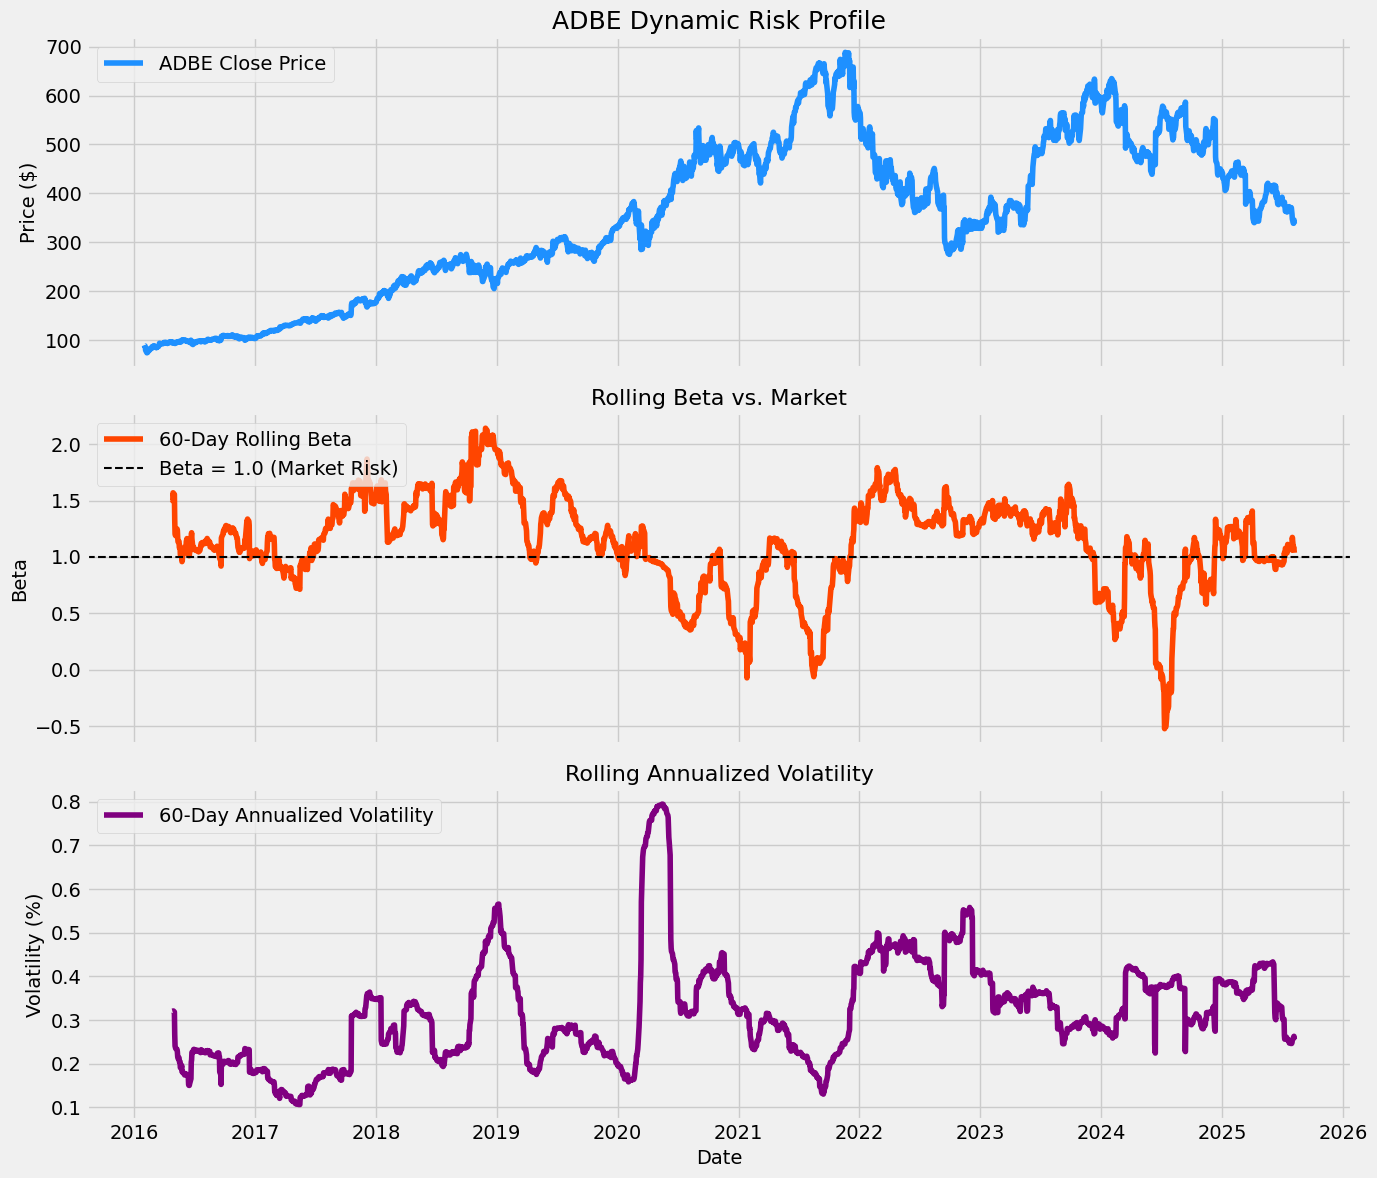

In [7]:
# rolling_risk_analysis_complete.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# IMPORTANT: Choose the ticker you want to analyze from your dataset.
TICKER_TO_ANALYZE = 'ADBE'
# Define the rolling window size (in days).
WINDOW_SIZE = 60

# --- 2. Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    print("File loaded. Analyzing dynamic risk profile...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 3. Calculate Market and Stock Returns ---
market_returns = df.groupby('Date')['Daily_Return'].mean()
market_returns.name = 'Market_Return'

stock_data = df[df['Ticker'] == TICKER_TO_ANALYZE].copy()
if stock_data.empty:
    print(f"Error: Ticker '{TICKER_TO_ANALYZE}' not found in the dataset. Please choose another.")
    exit()

combined_df = pd.concat([stock_data['Daily_Return'], market_returns], axis=1).dropna()
combined_df.columns = ['Stock_Return', 'Market_Return']

# --- 4. Calculate Rolling Risk Metrics ---
# Rolling Beta (Relative Risk)
rolling_cov = combined_df['Stock_Return'].rolling(window=WINDOW_SIZE).cov(combined_df['Market_Return'])
rolling_var = combined_df['Market_Return'].rolling(window=WINDOW_SIZE).var()
rolling_beta = rolling_cov / rolling_var
rolling_beta.name = f'{WINDOW_SIZE}-Day Rolling Beta'

# --- NEW: Calculate Rolling Volatility (Absolute Risk) ---
# We calculate the rolling standard deviation and annualize it.
rolling_vol = combined_df['Stock_Return'].rolling(window=WINDOW_SIZE).std() * np.sqrt(252)
rolling_vol.name = f'{WINDOW_SIZE}-Day Annualized Volatility'


# --- 5. Visualization ---
print("Generating plot...")
plt.style.use('fivethirtyeight')
# Create a figure with THREE subplots that share the same x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot 1: Stock Price (Context)
ax1.plot(stock_data['Close'], label=f'{TICKER_TO_ANALYZE} Close Price', color='dodgerblue')
ax1.set_title(f'{TICKER_TO_ANALYZE} Dynamic Risk Profile', fontsize=18)
ax1.set_ylabel('Price ($)', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot 2: Rolling Beta (Relative Risk)
ax2.plot(rolling_beta.index, rolling_beta, label=rolling_beta.name, color='orangered')
ax2.axhline(1.0, color='black', linestyle='--', linewidth=1.5, label='Beta = 1.0 (Market Risk)')
ax2.set_title(f'Rolling Beta vs. Market', fontsize=16)
ax2.set_ylabel('Beta', fontsize=14)
ax2.legend(loc='upper left')
ax2.grid(True)

# --- NEW: Plot 3: Rolling Volatility (Absolute Risk) ---
ax3.plot(rolling_vol.index, rolling_vol, label=rolling_vol.name, color='purple')
ax3.set_title(f'Rolling Annualized Volatility', fontsize=16)
ax3.set_ylabel('Volatility (%)', fontsize=14)
ax3.set_xlabel('Date', fontsize=14)
ax3.legend(loc='upper left')
ax3.grid(True)

plt.tight_layout()
plt.show()

#LNT

/tmp/ipython-input-4207792928.py:16: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


File loaded. Analyzing rolling beta...
Generating plot...


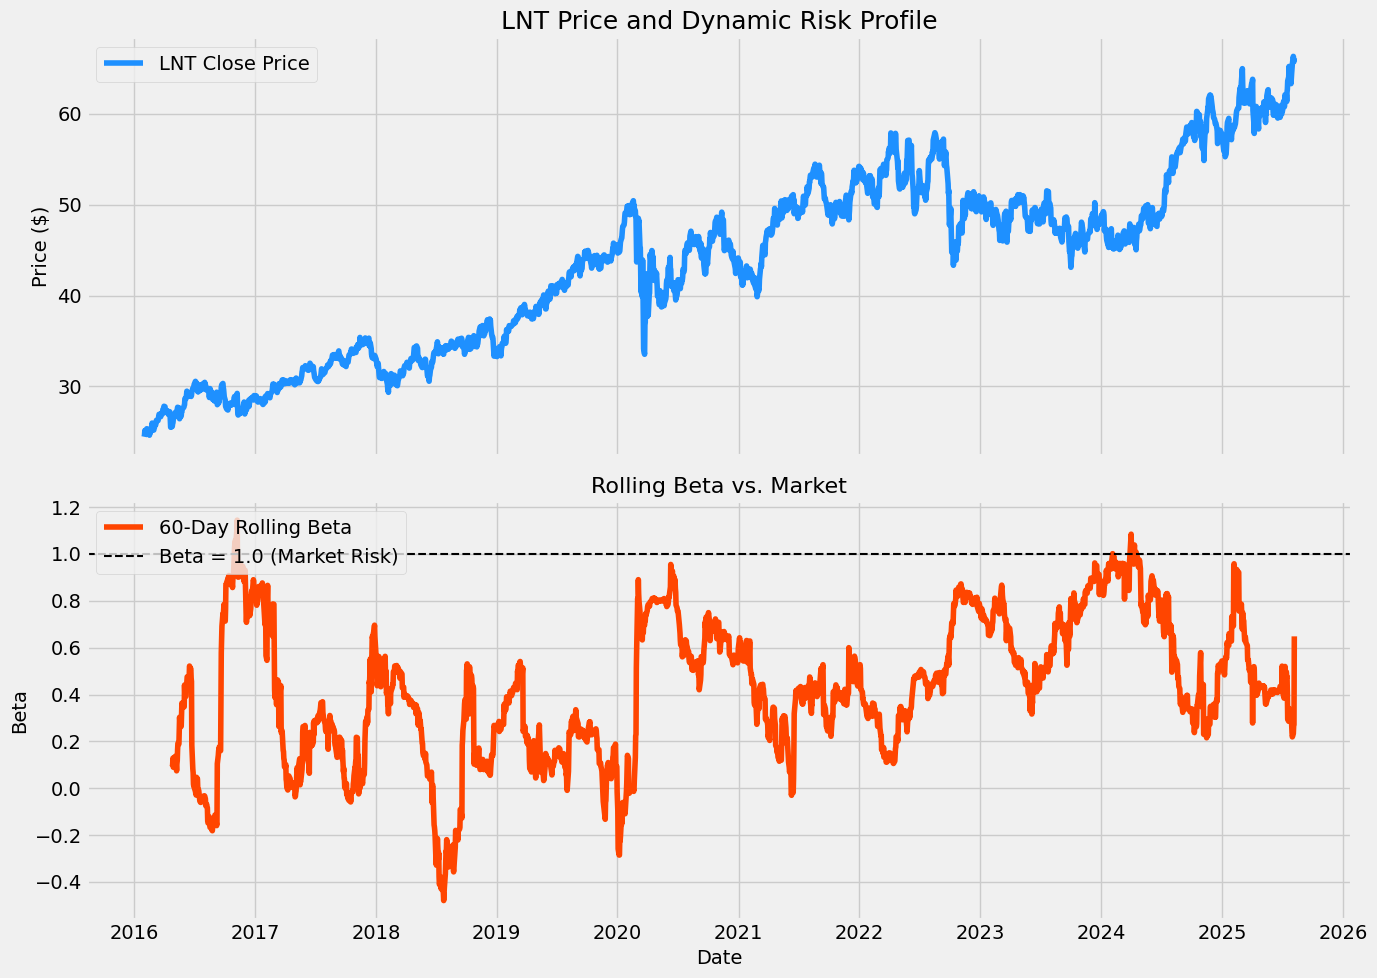

In [8]:
# rolling_beta_analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# IMPORTANT: Choose the ticker you want to analyze from your dataset.
TICKER_TO_ANALYZE = 'LNT'
# Define the rolling window size (in days). 60 days is about 3 months.
WINDOW_SIZE = 60

# --- 2. Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    print("File loaded. Analyzing rolling beta...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 3. Calculate Market and Stock Returns ---
# Calculate market return (as an equal-weighted average of all stocks)
market_returns = df.groupby('Date')['Daily_Return'].mean()
market_returns.name = 'Market_Return'

# Isolate the data for the specific stock
stock_data = df[df['Ticker'] == TICKER_TO_ANALYZE].copy()

if stock_data.empty:
    print(f"Error: Ticker '{TICKER_TO_ANALYZE}' not found in the dataset. Please choose another.")
    exit()

# Combine stock and market returns into one DataFrame
combined_df = pd.concat([stock_data['Daily_Return'], market_returns], axis=1).dropna()
combined_df.columns = ['Stock_Return', 'Market_Return']


# --- 4. Calculate Rolling Beta ---
# Calculate rolling covariance of stock returns with market returns
rolling_cov = combined_df['Stock_Return'].rolling(window=WINDOW_SIZE).cov(combined_df['Market_Return'])

# Calculate rolling variance of market returns
rolling_var = combined_df['Market_Return'].rolling(window=WINDOW_SIZE).var()

# Calculate rolling beta
rolling_beta = rolling_cov / rolling_var
rolling_beta.name = f'{WINDOW_SIZE}-Day Rolling Beta'


# --- 5. Visualization ---
print("Generating plot...")
plt.style.use('fivethirtyeight')
# Create a figure with two subplots that share the same x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Stock Price (for context)
ax1.plot(stock_data['Close'], label=f'{TICKER_TO_ANALYZE} Close Price', color='dodgerblue')
ax1.set_title(f'{TICKER_TO_ANALYZE} Price and Dynamic Risk Profile', fontsize=18)
ax1.set_ylabel('Price ($)', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot 2: Rolling Beta
ax2.plot(rolling_beta.index, rolling_beta, label=rolling_beta.name, color='orangered')
# Add a reference line at Beta = 1.0 (market risk)
ax2.axhline(1.0, color='black', linestyle='--', linewidth=1.5, label='Beta = 1.0 (Market Risk)')
ax2.set_title(f'Rolling Beta vs. Market', fontsize=16)
ax2.set_ylabel('Beta', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
ax2.legend(loc='upper left')
ax2.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1134519185.py:16: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


File loaded. Analyzing dynamic risk profile...
Generating plot...


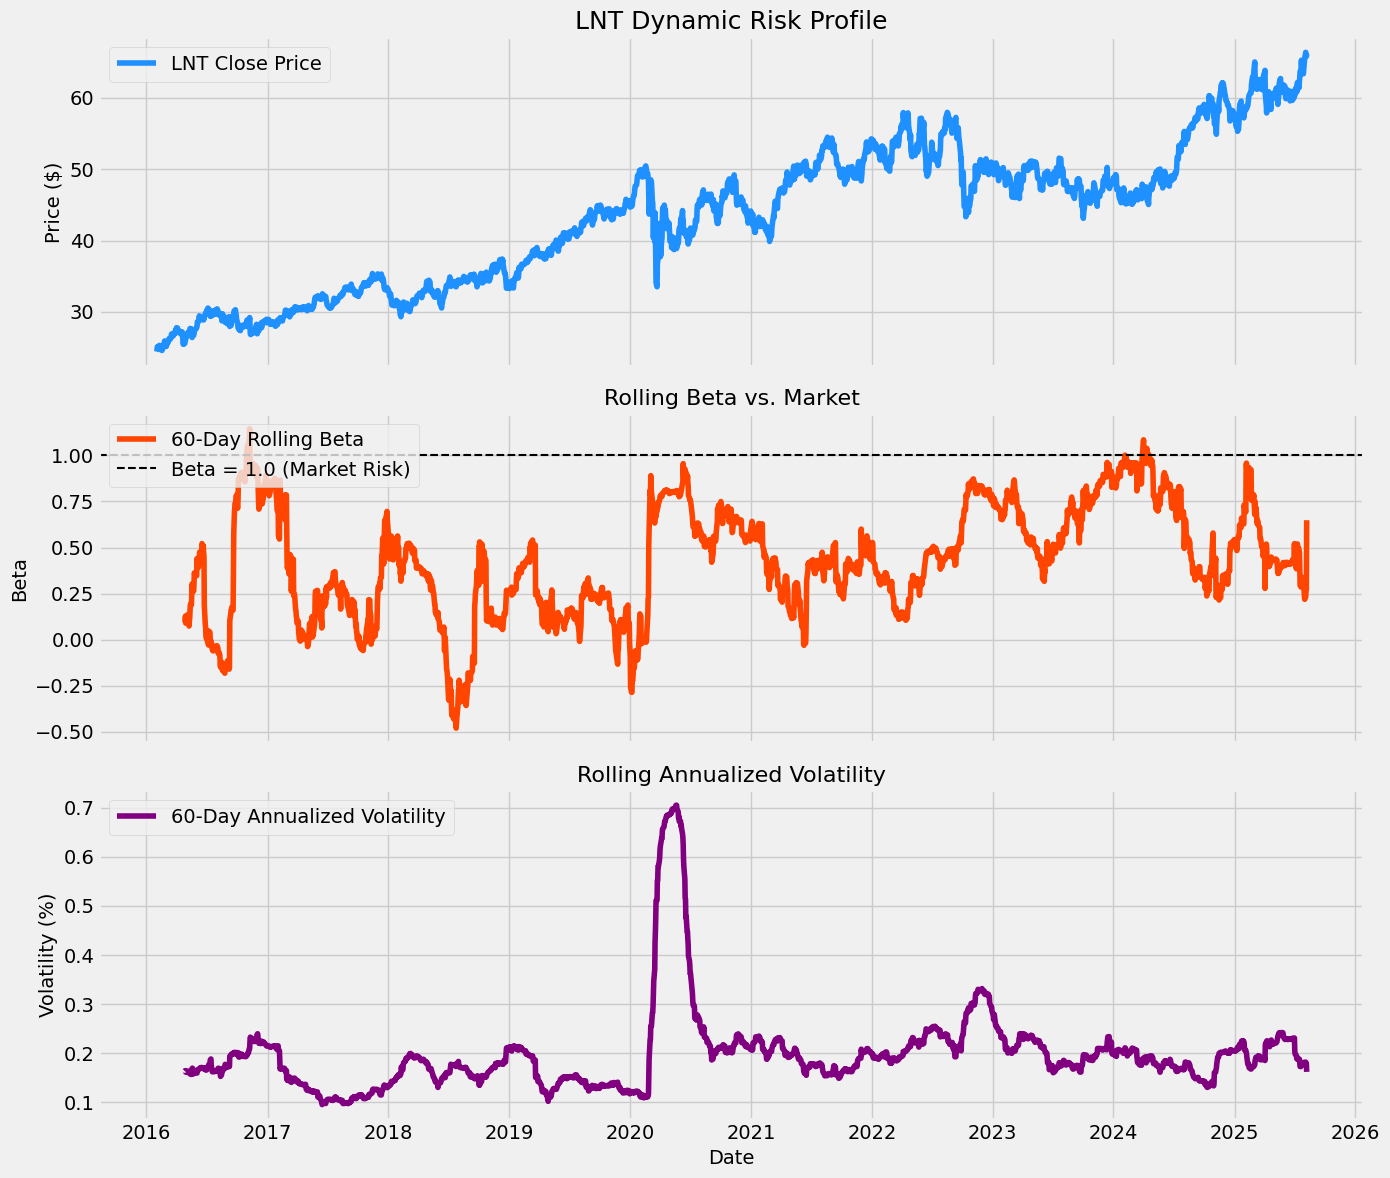

In [9]:
# rolling_risk_analysis_complete.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# IMPORTANT: Choose the ticker you want to analyze from your dataset.
TICKER_TO_ANALYZE = 'LNT'
# Define the rolling window size (in days).
WINDOW_SIZE = 60

# --- 2. Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    print("File loaded. Analyzing dynamic risk profile...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 3. Calculate Market and Stock Returns ---
market_returns = df.groupby('Date')['Daily_Return'].mean()
market_returns.name = 'Market_Return'

stock_data = df[df['Ticker'] == TICKER_TO_ANALYZE].copy()
if stock_data.empty:
    print(f"Error: Ticker '{TICKER_TO_ANALYZE}' not found in the dataset. Please choose another.")
    exit()

combined_df = pd.concat([stock_data['Daily_Return'], market_returns], axis=1).dropna()
combined_df.columns = ['Stock_Return', 'Market_Return']

# --- 4. Calculate Rolling Risk Metrics ---
# Rolling Beta (Relative Risk)
rolling_cov = combined_df['Stock_Return'].rolling(window=WINDOW_SIZE).cov(combined_df['Market_Return'])
rolling_var = combined_df['Market_Return'].rolling(window=WINDOW_SIZE).var()
rolling_beta = rolling_cov / rolling_var
rolling_beta.name = f'{WINDOW_SIZE}-Day Rolling Beta'

# --- NEW: Calculate Rolling Volatility (Absolute Risk) ---
# We calculate the rolling standard deviation and annualize it.
rolling_vol = combined_df['Stock_Return'].rolling(window=WINDOW_SIZE).std() * np.sqrt(252)
rolling_vol.name = f'{WINDOW_SIZE}-Day Annualized Volatility'


# --- 5. Visualization ---
print("Generating plot...")
plt.style.use('fivethirtyeight')
# Create a figure with THREE subplots that share the same x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot 1: Stock Price (Context)
ax1.plot(stock_data['Close'], label=f'{TICKER_TO_ANALYZE} Close Price', color='dodgerblue')
ax1.set_title(f'{TICKER_TO_ANALYZE} Dynamic Risk Profile', fontsize=18)
ax1.set_ylabel('Price ($)', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot 2: Rolling Beta (Relative Risk)
ax2.plot(rolling_beta.index, rolling_beta, label=rolling_beta.name, color='orangered')
ax2.axhline(1.0, color='black', linestyle='--', linewidth=1.5, label='Beta = 1.0 (Market Risk)')
ax2.set_title(f'Rolling Beta vs. Market', fontsize=16)
ax2.set_ylabel('Beta', fontsize=14)
ax2.legend(loc='upper left')
ax2.grid(True)

# --- NEW: Plot 3: Rolling Volatility (Absolute Risk) ---
ax3.plot(rolling_vol.index, rolling_vol, label=rolling_vol.name, color='purple')
ax3.set_title(f'Rolling Annualized Volatility', fontsize=16)
ax3.set_ylabel('Volatility (%)', fontsize=14)
ax3.set_xlabel('Date', fontsize=14)
ax3.legend(loc='upper left')
ax3.grid(True)

plt.tight_layout()
plt.show()

#AXP

/tmp/ipython-input-3509377091.py:16: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


File loaded. Analyzing rolling beta...
Generating plot...


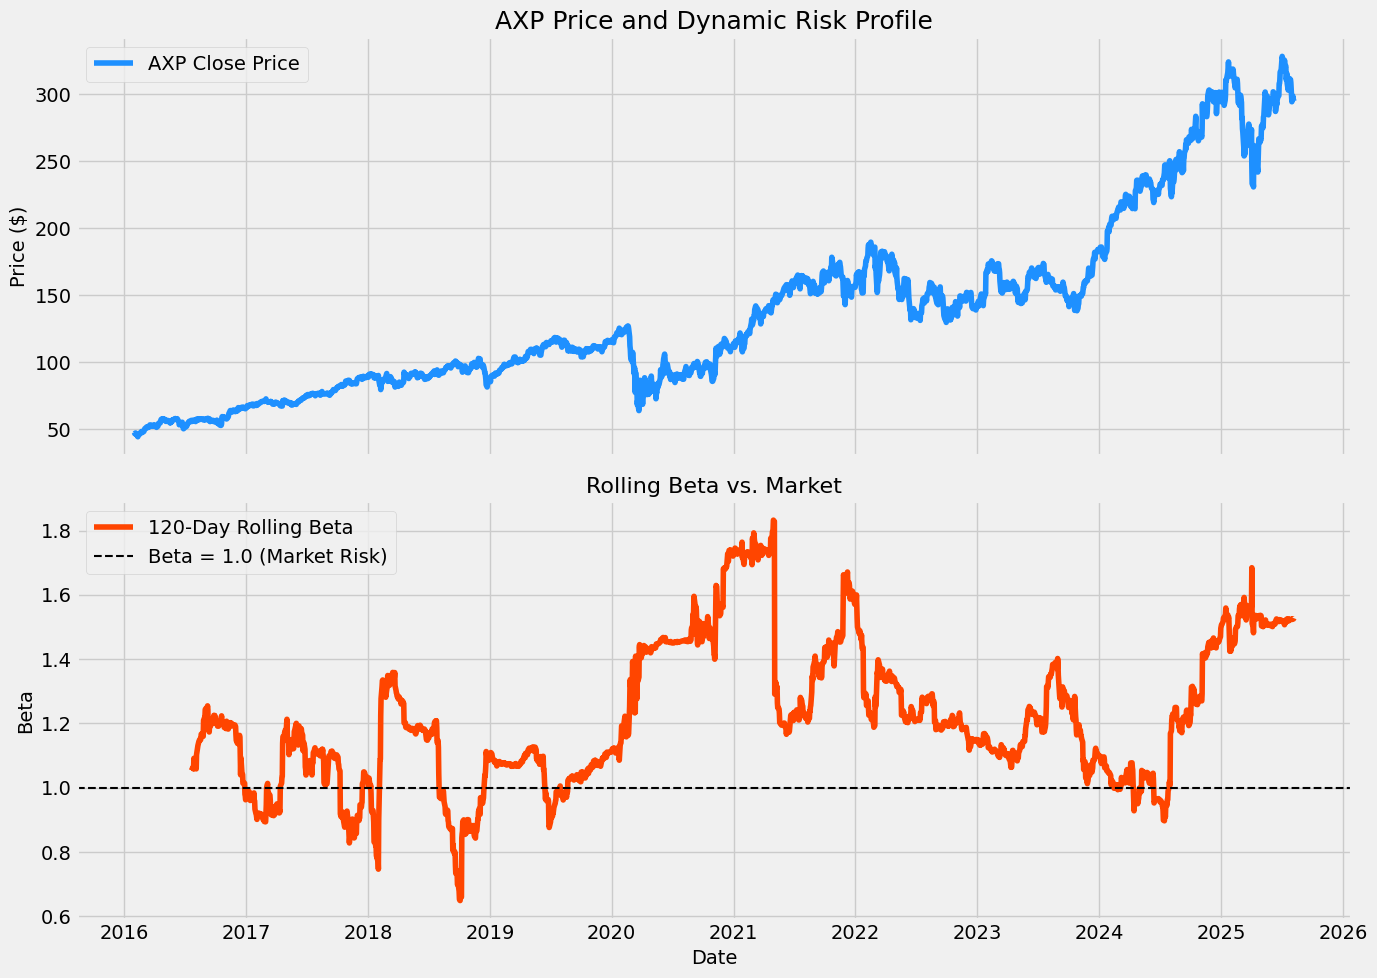

In [10]:
# rolling_beta_analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# IMPORTANT: Choose the ticker you want to analyze from your dataset.
TICKER_TO_ANALYZE = 'AXP'
# Define the rolling window size (in days). 60 days is about 3 months.
WINDOW_SIZE = 120

# --- 2. Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    print("File loaded. Analyzing rolling beta...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 3. Calculate Market and Stock Returns ---
# Calculate market return (as an equal-weighted average of all stocks)
market_returns = df.groupby('Date')['Daily_Return'].mean()
market_returns.name = 'Market_Return'

# Isolate the data for the specific stock
stock_data = df[df['Ticker'] == TICKER_TO_ANALYZE].copy()

if stock_data.empty:
    print(f"Error: Ticker '{TICKER_TO_ANALYZE}' not found in the dataset. Please choose another.")
    exit()

# Combine stock and market returns into one DataFrame
combined_df = pd.concat([stock_data['Daily_Return'], market_returns], axis=1).dropna()
combined_df.columns = ['Stock_Return', 'Market_Return']


# --- 4. Calculate Rolling Beta ---
# Calculate rolling covariance of stock returns with market returns
rolling_cov = combined_df['Stock_Return'].rolling(window=WINDOW_SIZE).cov(combined_df['Market_Return'])

# Calculate rolling variance of market returns
rolling_var = combined_df['Market_Return'].rolling(window=WINDOW_SIZE).var()

# Calculate rolling beta
rolling_beta = rolling_cov / rolling_var
rolling_beta.name = f'{WINDOW_SIZE}-Day Rolling Beta'


# --- 5. Visualization ---
print("Generating plot...")
plt.style.use('fivethirtyeight')
# Create a figure with two subplots that share the same x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Stock Price (for context)
ax1.plot(stock_data['Close'], label=f'{TICKER_TO_ANALYZE} Close Price', color='dodgerblue')
ax1.set_title(f'{TICKER_TO_ANALYZE} Price and Dynamic Risk Profile', fontsize=18)
ax1.set_ylabel('Price ($)', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot 2: Rolling Beta
ax2.plot(rolling_beta.index, rolling_beta, label=rolling_beta.name, color='orangered')
# Add a reference line at Beta = 1.0 (market risk)
ax2.axhline(1.0, color='black', linestyle='--', linewidth=1.5, label='Beta = 1.0 (Market Risk)')
ax2.set_title(f'Rolling Beta vs. Market', fontsize=16)
ax2.set_ylabel('Beta', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
ax2.legend(loc='upper left')
ax2.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1860586861.py:16: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


File loaded. Analyzing dynamic risk profile...
Generating plot...


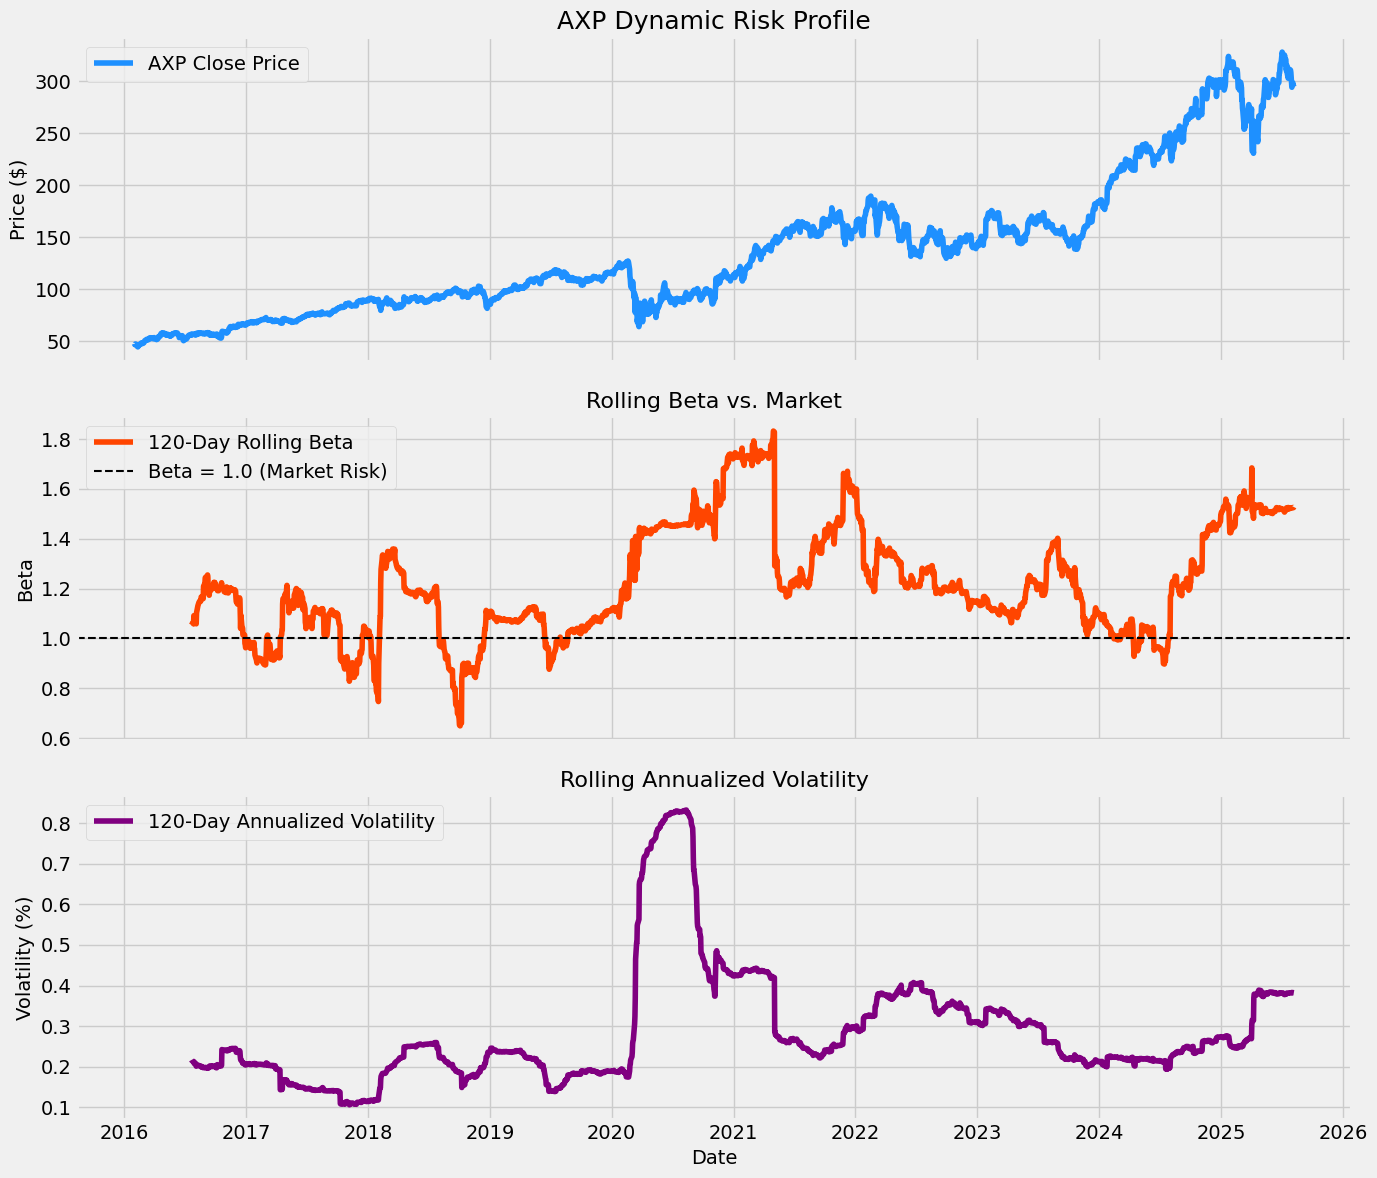

In [11]:
# rolling_risk_analysis_complete.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# IMPORTANT: Choose the ticker you want to analyze from your dataset.
TICKER_TO_ANALYZE = 'AXP'
# Define the rolling window size (in days).
WINDOW_SIZE = 120

# --- 2. Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    print("File loaded. Analyzing dynamic risk profile...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 3. Calculate Market and Stock Returns ---
market_returns = df.groupby('Date')['Daily_Return'].mean()
market_returns.name = 'Market_Return'

stock_data = df[df['Ticker'] == TICKER_TO_ANALYZE].copy()
if stock_data.empty:
    print(f"Error: Ticker '{TICKER_TO_ANALYZE}' not found in the dataset. Please choose another.")
    exit()

combined_df = pd.concat([stock_data['Daily_Return'], market_returns], axis=1).dropna()
combined_df.columns = ['Stock_Return', 'Market_Return']

# --- 4. Calculate Rolling Risk Metrics ---
# Rolling Beta (Relative Risk)
rolling_cov = combined_df['Stock_Return'].rolling(window=WINDOW_SIZE).cov(combined_df['Market_Return'])
rolling_var = combined_df['Market_Return'].rolling(window=WINDOW_SIZE).var()
rolling_beta = rolling_cov / rolling_var
rolling_beta.name = f'{WINDOW_SIZE}-Day Rolling Beta'

# --- NEW: Calculate Rolling Volatility (Absolute Risk) ---
# We calculate the rolling standard deviation and annualize it.
rolling_vol = combined_df['Stock_Return'].rolling(window=WINDOW_SIZE).std() * np.sqrt(252)
rolling_vol.name = f'{WINDOW_SIZE}-Day Annualized Volatility'


# --- 5. Visualization ---
print("Generating plot...")
plt.style.use('fivethirtyeight')
# Create a figure with THREE subplots that share the same x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot 1: Stock Price (Context)
ax1.plot(stock_data['Close'], label=f'{TICKER_TO_ANALYZE} Close Price', color='dodgerblue')
ax1.set_title(f'{TICKER_TO_ANALYZE} Dynamic Risk Profile', fontsize=18)
ax1.set_ylabel('Price ($)', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot 2: Rolling Beta (Relative Risk)
ax2.plot(rolling_beta.index, rolling_beta, label=rolling_beta.name, color='orangered')
ax2.axhline(1.0, color='black', linestyle='--', linewidth=1.5, label='Beta = 1.0 (Market Risk)')
ax2.set_title(f'Rolling Beta vs. Market', fontsize=16)
ax2.set_ylabel('Beta', fontsize=14)
ax2.legend(loc='upper left')
ax2.grid(True)

# --- NEW: Plot 3: Rolling Volatility (Absolute Risk) ---
ax3.plot(rolling_vol.index, rolling_vol, label=rolling_vol.name, color='purple')
ax3.set_title(f'Rolling Annualized Volatility', fontsize=16)
ax3.set_ylabel('Volatility (%)', fontsize=14)
ax3.set_xlabel('Date', fontsize=14)
ax3.legend(loc='upper left')
ax3.grid(True)

plt.tight_layout()
plt.show()

#BLK

/tmp/ipython-input-3602179556.py:16: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


File loaded. Analyzing rolling beta...
Generating plot...


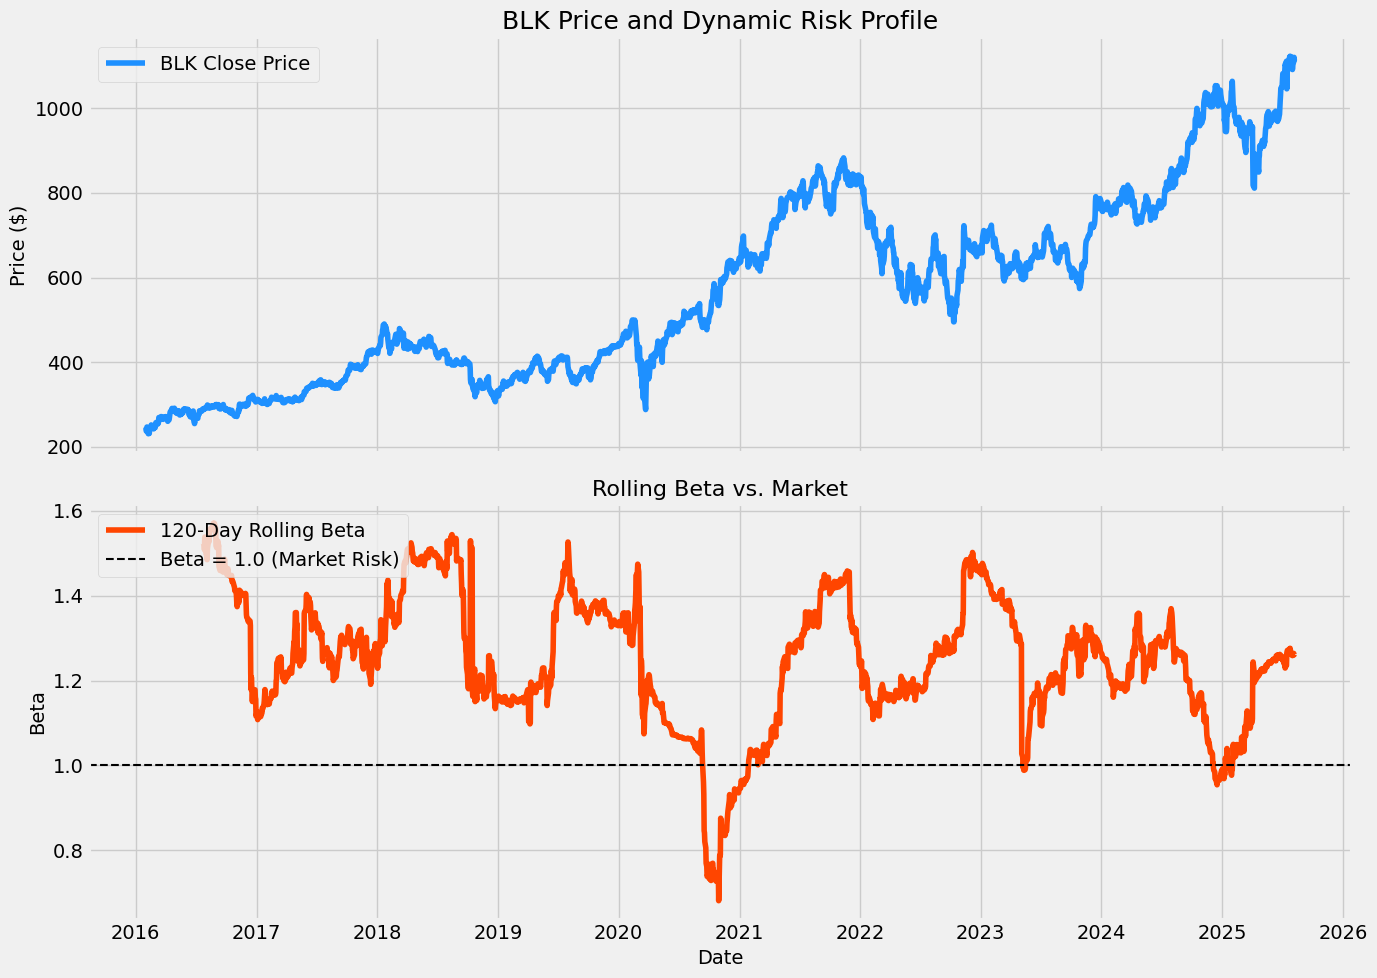

In [12]:
# rolling_beta_analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# IMPORTANT: Choose the ticker you want to analyze from your dataset.
TICKER_TO_ANALYZE = 'BLK'
# Define the rolling window size (in days). 60 days is about 3 months.
WINDOW_SIZE = 120

# --- 2. Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    print("File loaded. Analyzing rolling beta...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 3. Calculate Market and Stock Returns ---
# Calculate market return (as an equal-weighted average of all stocks)
market_returns = df.groupby('Date')['Daily_Return'].mean()
market_returns.name = 'Market_Return'

# Isolate the data for the specific stock
stock_data = df[df['Ticker'] == TICKER_TO_ANALYZE].copy()

if stock_data.empty:
    print(f"Error: Ticker '{TICKER_TO_ANALYZE}' not found in the dataset. Please choose another.")
    exit()

# Combine stock and market returns into one DataFrame
combined_df = pd.concat([stock_data['Daily_Return'], market_returns], axis=1).dropna()
combined_df.columns = ['Stock_Return', 'Market_Return']


# --- 4. Calculate Rolling Beta ---
# Calculate rolling covariance of stock returns with market returns
rolling_cov = combined_df['Stock_Return'].rolling(window=WINDOW_SIZE).cov(combined_df['Market_Return'])

# Calculate rolling variance of market returns
rolling_var = combined_df['Market_Return'].rolling(window=WINDOW_SIZE).var()

# Calculate rolling beta
rolling_beta = rolling_cov / rolling_var
rolling_beta.name = f'{WINDOW_SIZE}-Day Rolling Beta'


# --- 5. Visualization ---
print("Generating plot...")
plt.style.use('fivethirtyeight')
# Create a figure with two subplots that share the same x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Stock Price (for context)
ax1.plot(stock_data['Close'], label=f'{TICKER_TO_ANALYZE} Close Price', color='dodgerblue')
ax1.set_title(f'{TICKER_TO_ANALYZE} Price and Dynamic Risk Profile', fontsize=18)
ax1.set_ylabel('Price ($)', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot 2: Rolling Beta
ax2.plot(rolling_beta.index, rolling_beta, label=rolling_beta.name, color='orangered')
# Add a reference line at Beta = 1.0 (market risk)
ax2.axhline(1.0, color='black', linestyle='--', linewidth=1.5, label='Beta = 1.0 (Market Risk)')
ax2.set_title(f'Rolling Beta vs. Market', fontsize=16)
ax2.set_ylabel('Beta', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
ax2.legend(loc='upper left')
ax2.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipython-input-634060989.py:16: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


File loaded. Analyzing dynamic risk profile...
Generating plot...


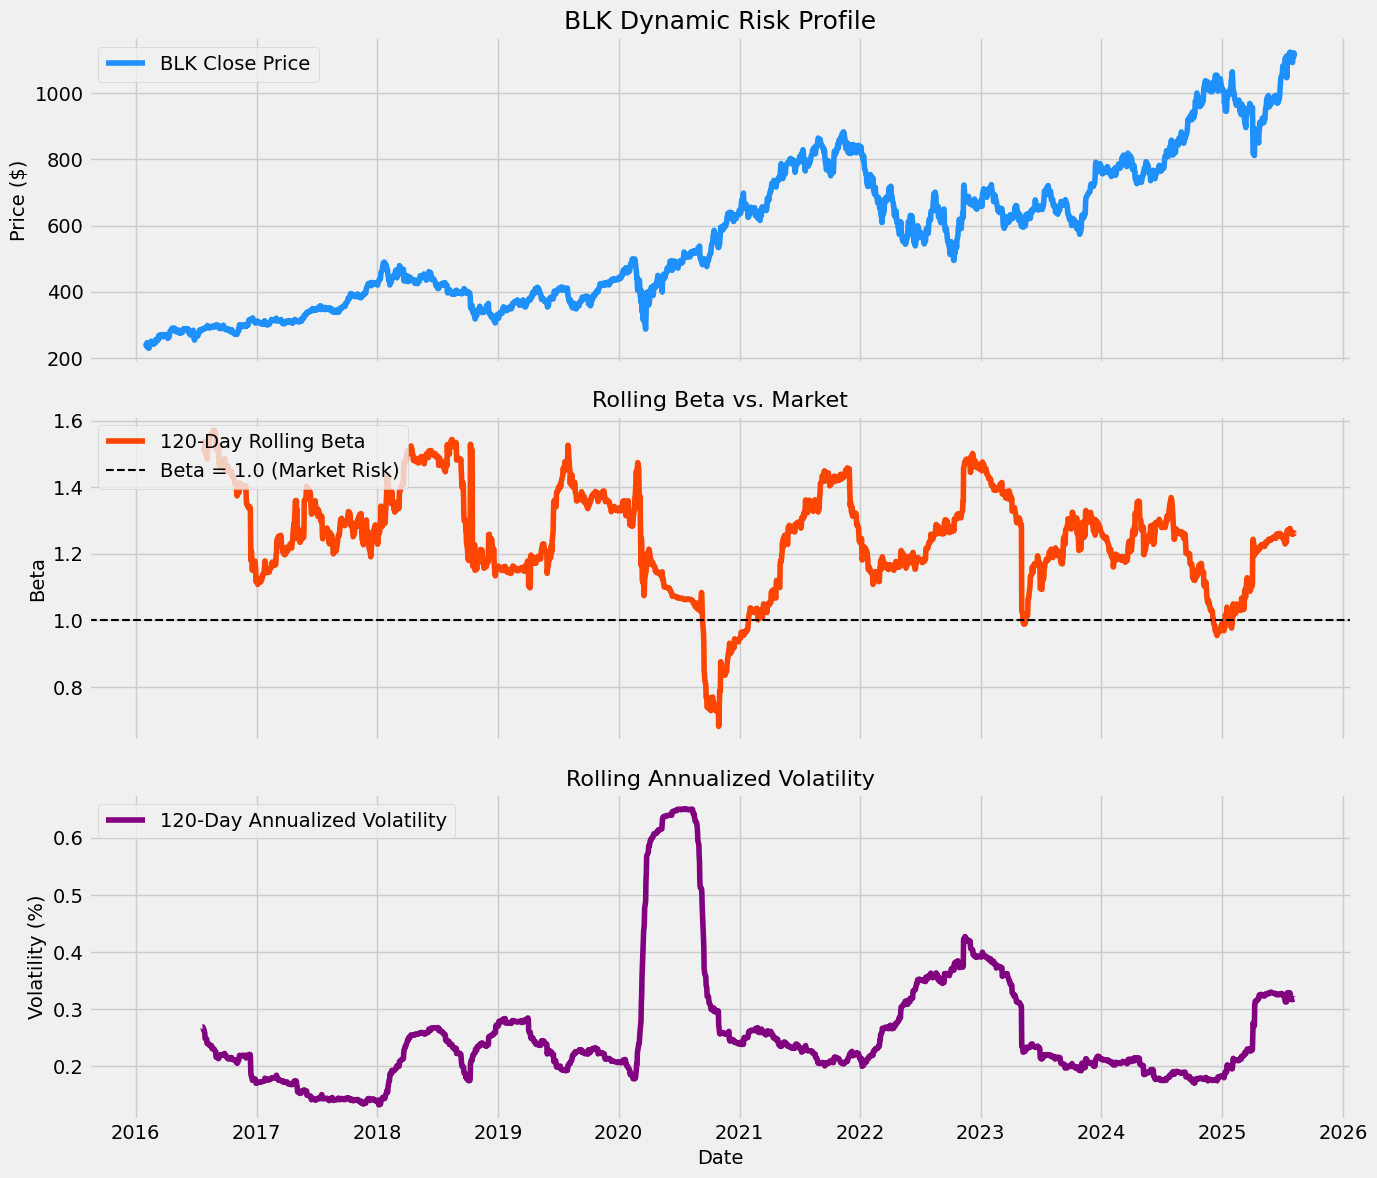

In [13]:
# rolling_risk_analysis_complete.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# IMPORTANT: Choose the ticker you want to analyze from your dataset.
TICKER_TO_ANALYZE = 'BLK'
# Define the rolling window size (in days).
WINDOW_SIZE = 120

# --- 2. Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    print("File loaded. Analyzing dynamic risk profile...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 3. Calculate Market and Stock Returns ---
market_returns = df.groupby('Date')['Daily_Return'].mean()
market_returns.name = 'Market_Return'

stock_data = df[df['Ticker'] == TICKER_TO_ANALYZE].copy()
if stock_data.empty:
    print(f"Error: Ticker '{TICKER_TO_ANALYZE}' not found in the dataset. Please choose another.")
    exit()

combined_df = pd.concat([stock_data['Daily_Return'], market_returns], axis=1).dropna()
combined_df.columns = ['Stock_Return', 'Market_Return']

# --- 4. Calculate Rolling Risk Metrics ---
# Rolling Beta (Relative Risk)
rolling_cov = combined_df['Stock_Return'].rolling(window=WINDOW_SIZE).cov(combined_df['Market_Return'])
rolling_var = combined_df['Market_Return'].rolling(window=WINDOW_SIZE).var()
rolling_beta = rolling_cov / rolling_var
rolling_beta.name = f'{WINDOW_SIZE}-Day Rolling Beta'

# --- NEW: Calculate Rolling Volatility (Absolute Risk) ---
# We calculate the rolling standard deviation and annualize it.
rolling_vol = combined_df['Stock_Return'].rolling(window=WINDOW_SIZE).std() * np.sqrt(252)
rolling_vol.name = f'{WINDOW_SIZE}-Day Annualized Volatility'


# --- 5. Visualization ---
print("Generating plot...")
plt.style.use('fivethirtyeight')
# Create a figure with THREE subplots that share the same x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot 1: Stock Price (Context)
ax1.plot(stock_data['Close'], label=f'{TICKER_TO_ANALYZE} Close Price', color='dodgerblue')
ax1.set_title(f'{TICKER_TO_ANALYZE} Dynamic Risk Profile', fontsize=18)
ax1.set_ylabel('Price ($)', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot 2: Rolling Beta (Relative Risk)
ax2.plot(rolling_beta.index, rolling_beta, label=rolling_beta.name, color='orangered')
ax2.axhline(1.0, color='black', linestyle='--', linewidth=1.5, label='Beta = 1.0 (Market Risk)')
ax2.set_title(f'Rolling Beta vs. Market', fontsize=16)
ax2.set_ylabel('Beta', fontsize=14)
ax2.legend(loc='upper left')
ax2.grid(True)

# --- NEW: Plot 3: Rolling Volatility (Absolute Risk) ---
ax3.plot(rolling_vol.index, rolling_vol, label=rolling_vol.name, color='purple')
ax3.set_title(f'Rolling Annualized Volatility', fontsize=16)
ax3.set_ylabel('Volatility (%)', fontsize=14)
ax3.set_xlabel('Date', fontsize=14)
ax3.legend(loc='upper left')
ax3.grid(True)

plt.tight_layout()
plt.show()

#Interactive Candlestick Charts


In [7]:
# project_candlestick_chart.py
import pandas as pd
import plotly.graph_objects as go

# --- Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
TICKER_TO_ANALYZE = 'INTC'

# --- Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME)

    # --- UPDATE: Ensure 'Date' is a column ---
    # This prevents a KeyError if 'Date' was set as the index in a previous step.
    if 'Date' not in df.columns:
        df = df.reset_index()

    df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)
    print("File loaded. Preparing candlestick chart...")

except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Filter for the specific stock and calculate moving averages
stock_df = df[df['Ticker'] == TICKER_TO_ANALYZE].copy()
if stock_df.empty:
    print(f"Error: Ticker '{TICKER_TO_ANALYZE}' not found.")
    exit()

stock_df['MA20'] = stock_df['Close'].rolling(window=20).mean()
stock_df['MA50'] = stock_df['Close'].rolling(window=50).mean()


# --- Visualization ---
print("Generating interactive chart...")
fig = go.Figure()

# Add Candlestick trace
fig.add_trace(go.Candlestick(x=stock_df['Date'],
                             open=stock_df['Open'],
                             high=stock_df['High'],
                             low=stock_df['Low'],
                             close=stock_df['Close'],
                             name='Price'))

# Add Moving Average traces
fig.add_trace(go.Scatter(x=stock_df['Date'], y=stock_df['MA20'],
                         line=dict(color='orange', width=1.5),
                         name='20-Day MA'))
fig.add_trace(go.Scatter(x=stock_df['Date'], y=stock_df['MA50'],
                         line=dict(color='purple', width=1.5),
                         name='50-Day MA'))

# Update layout for a professional look
fig.update_layout(
    title=f'{TICKER_TO_ANALYZE} Price Action with Moving Averages',
    yaxis_title='Stock Price ($)',
    xaxis_title='Date',
    xaxis_rangeslider_visible=True, # Adds a range slider at the bottom
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

fig.show()

/tmp/ipython-input-1200848717.py:18: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)


An error occurred: Can only use .dt accessor with datetimelike values
Generating interactive chart...


In [1]:
# project_candlestick_chart.py
import pandas as pd
import plotly.graph_objects as go

# --- Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
TICKER_TO_ANALYZE = 'MAR'

# --- Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME)

    # --- UPDATE: Ensure 'Date' is a column ---
    # This prevents a KeyError if 'Date' was set as the index in a previous step.
    if 'Date' not in df.columns:
        df = df.reset_index()

    df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)
    print("File loaded. Preparing candlestick chart...")

except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Filter for the specific stock and calculate moving averages
stock_df = df[df['Ticker'] == TICKER_TO_ANALYZE].copy()
if stock_df.empty:
    print(f"Error: Ticker '{TICKER_TO_ANALYZE}' not found.")
    exit()

stock_df['MA20'] = stock_df['Close'].rolling(window=20).mean()
stock_df['MA50'] = stock_df['Close'].rolling(window=50).mean()


# --- Visualization ---
print("Generating interactive chart...")
fig = go.Figure()

# Add Candlestick trace
fig.add_trace(go.Candlestick(x=stock_df['Date'],
                             open=stock_df['Open'],
                             high=stock_df['High'],
                             low=stock_df['Low'],
                             close=stock_df['Close'],
                             name='Price'))

# Add Moving Average traces
fig.add_trace(go.Scatter(x=stock_df['Date'], y=stock_df['MA20'],
                         line=dict(color='orange', width=1.5),
                         name='20-Day MA'))
fig.add_trace(go.Scatter(x=stock_df['Date'], y=stock_df['MA50'],
                         line=dict(color='purple', width=1.5),
                         name='50-Day MA'))

# Update layout for a professional look
fig.update_layout(
    title=f'{TICKER_TO_ANALYZE} Price Action with Moving Averages',
    yaxis_title='Stock Price ($)',
    xaxis_title='Date',
    xaxis_rangeslider_visible=True, # Adds a range slider at the bottom
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

fig.show()

/tmp/ipython-input-3870567597.py:18: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)


An error occurred: Can only use .dt accessor with datetimelike values
Generating interactive chart...


#Head-to-Head Stock Comparison

An error occurred: Can only use .dt accessor with datetimelike values
Generating comparison plot...


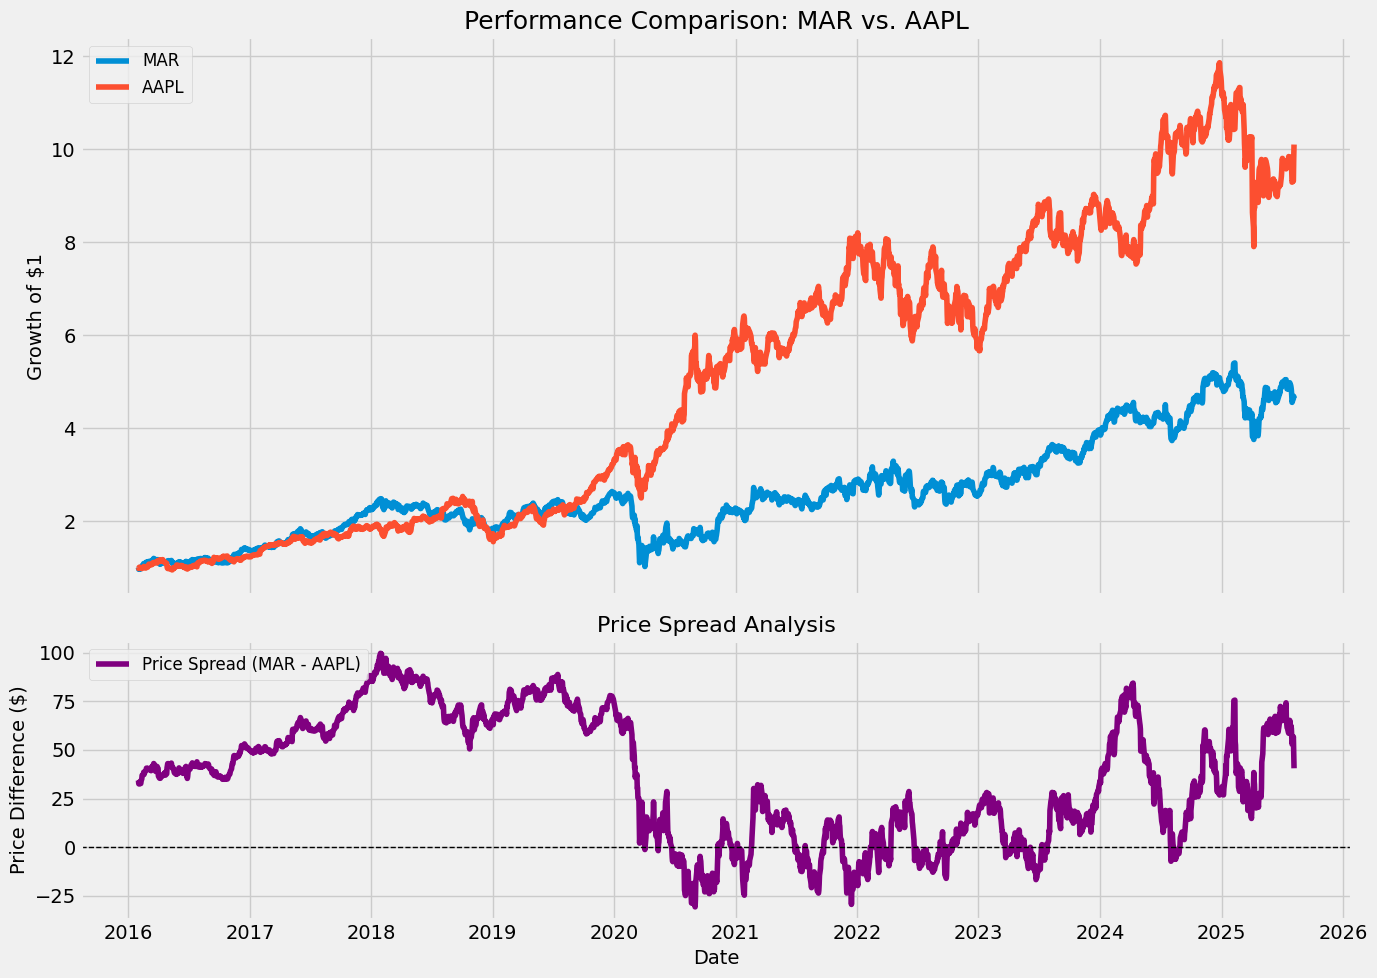

In [1]:
# project_head_to_head.py
import pandas as pd
import matplotlib.pyplot as plt

# --- Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# Choose the two tickers you want to compare
TICKER_A = 'MAR'
TICKER_B = 'AAPL'

# --- Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME, parse_dates=['Date'])
    df['Date'] = df['Date'].dt.tz_localize(None)
    print("File loaded. Comparing stocks...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Filter for the two tickers and create a pivot table of their closing prices
compare_df = df[df['Ticker'].isin([TICKER_A, TICKER_B])]
price_pivot = compare_df.pivot_table(index='Date', columns='Ticker', values='Close').dropna()

# --- Analysis ---
# 1. Normalized Performance (Growth of $1)
# We divide each price series by its first price point to normalize them
normalized_performance = price_pivot / price_pivot.iloc[0]

# 2. Price Spread
price_spread = price_pivot[TICKER_A] - price_pivot[TICKER_B]

# --- Visualization ---
print("Generating comparison plot...")
plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True,
                               gridspec_kw={'height_ratios': [2, 1]})

# Plot 1: Normalized Performance
ax1.plot(normalized_performance.index, normalized_performance[TICKER_A], label=TICKER_A)
ax1.plot(normalized_performance.index, normalized_performance[TICKER_B], label=TICKER_B)
ax1.set_title(f'Performance Comparison: {TICKER_A} vs. {TICKER_B}', fontsize=18)
ax1.set_ylabel('Growth of $1', fontsize=14)
ax1.legend(loc='upper left', fontsize=12)
ax1.grid(True)

# Plot 2: Price Spread
ax2.plot(price_spread.index, price_spread, label=f'Price Spread ({TICKER_A} - {TICKER_B})', color='purple')
ax2.axhline(0, color='black', linestyle='--', linewidth=1)
ax2.set_title('Price Spread Analysis', fontsize=16)
ax2.set_ylabel('Price Difference ($)', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
ax2.legend(loc='upper left', fontsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()

An error occurred: Can only use .dt accessor with datetimelike values
Generating comparison plot...


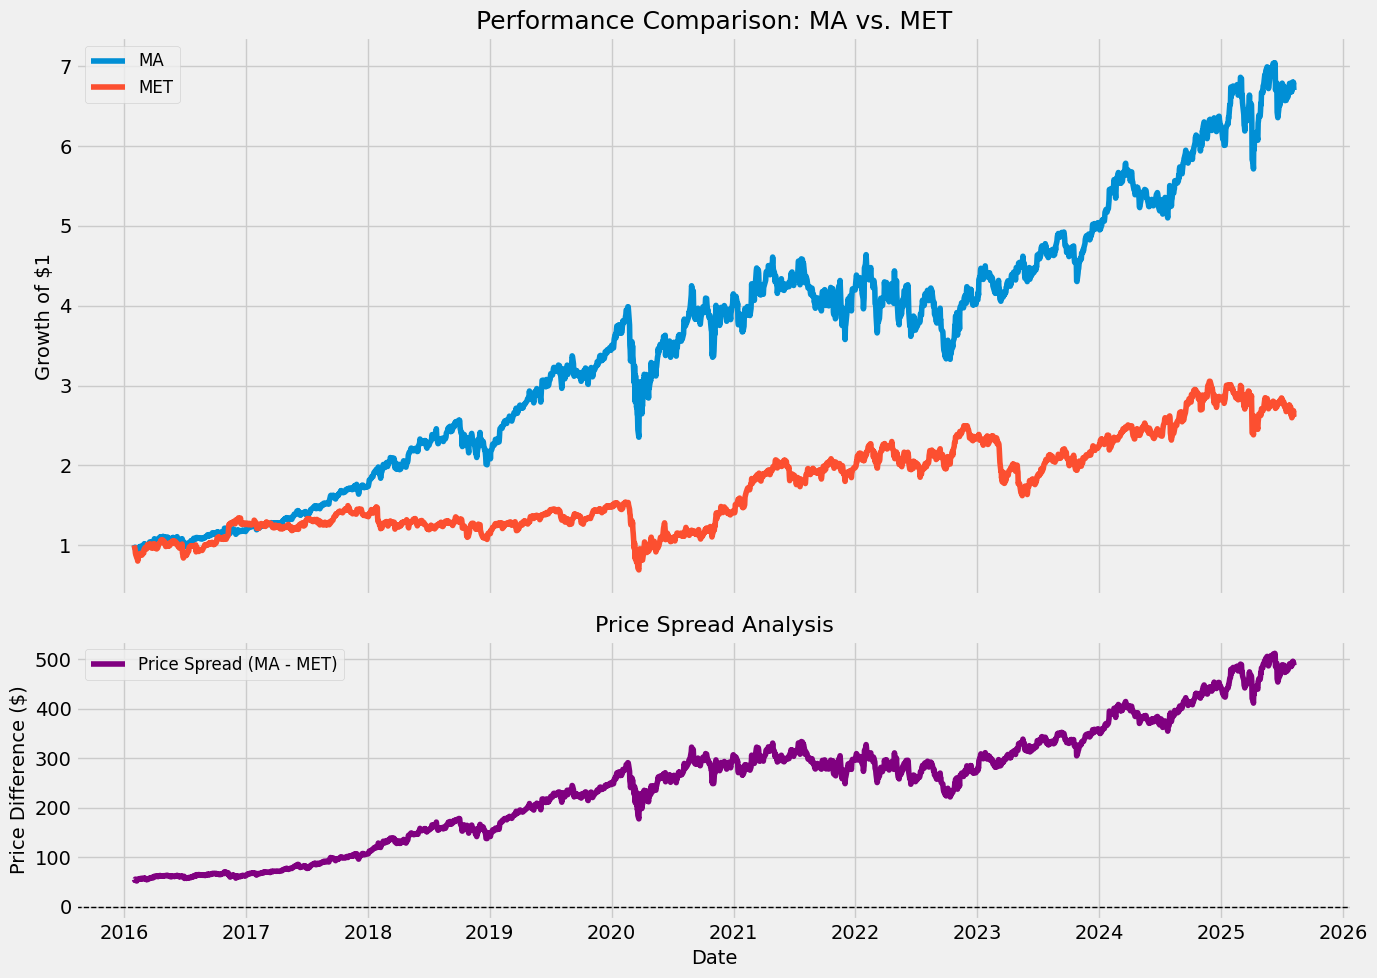

In [1]:
# project_head_to_head.py
import pandas as pd
import matplotlib.pyplot as plt

# --- Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# Choose the two tickers you want to compare
TICKER_A = 'MA'
TICKER_B = 'MET'

# --- Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME, parse_dates=['Date'])
    df['Date'] = df['Date'].dt.tz_localize(None)
    print("File loaded. Comparing stocks...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Filter for the two tickers and create a pivot table of their closing prices
compare_df = df[df['Ticker'].isin([TICKER_A, TICKER_B])]
price_pivot = compare_df.pivot_table(index='Date', columns='Ticker', values='Close').dropna()

# --- Analysis ---
# 1. Normalized Performance (Growth of $1)
# We divide each price series by its first price point to normalize them
normalized_performance = price_pivot / price_pivot.iloc[0]

# 2. Price Spread
price_spread = price_pivot[TICKER_A] - price_pivot[TICKER_B]

# --- Visualization ---
print("Generating comparison plot...")
plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True,
                               gridspec_kw={'height_ratios': [2, 1]})

# Plot 1: Normalized Performance
ax1.plot(normalized_performance.index, normalized_performance[TICKER_A], label=TICKER_A)
ax1.plot(normalized_performance.index, normalized_performance[TICKER_B], label=TICKER_B)
ax1.set_title(f'Performance Comparison: {TICKER_A} vs. {TICKER_B}', fontsize=18)
ax1.set_ylabel('Growth of $1', fontsize=14)
ax1.legend(loc='upper left', fontsize=12)
ax1.grid(True)

# Plot 2: Price Spread
ax2.plot(price_spread.index, price_spread, label=f'Price Spread ({TICKER_A} - {TICKER_B})', color='purple')
ax2.axhline(0, color='black', linestyle='--', linewidth=1)
ax2.set_title('Price Spread Analysis', fontsize=16)
ax2.set_ylabel('Price Difference ($)', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
ax2.legend(loc='upper left', fontsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()

# Relative Strength Analysis

An error occurred: Can only use .dt accessor with datetimelike values
Generating plot...


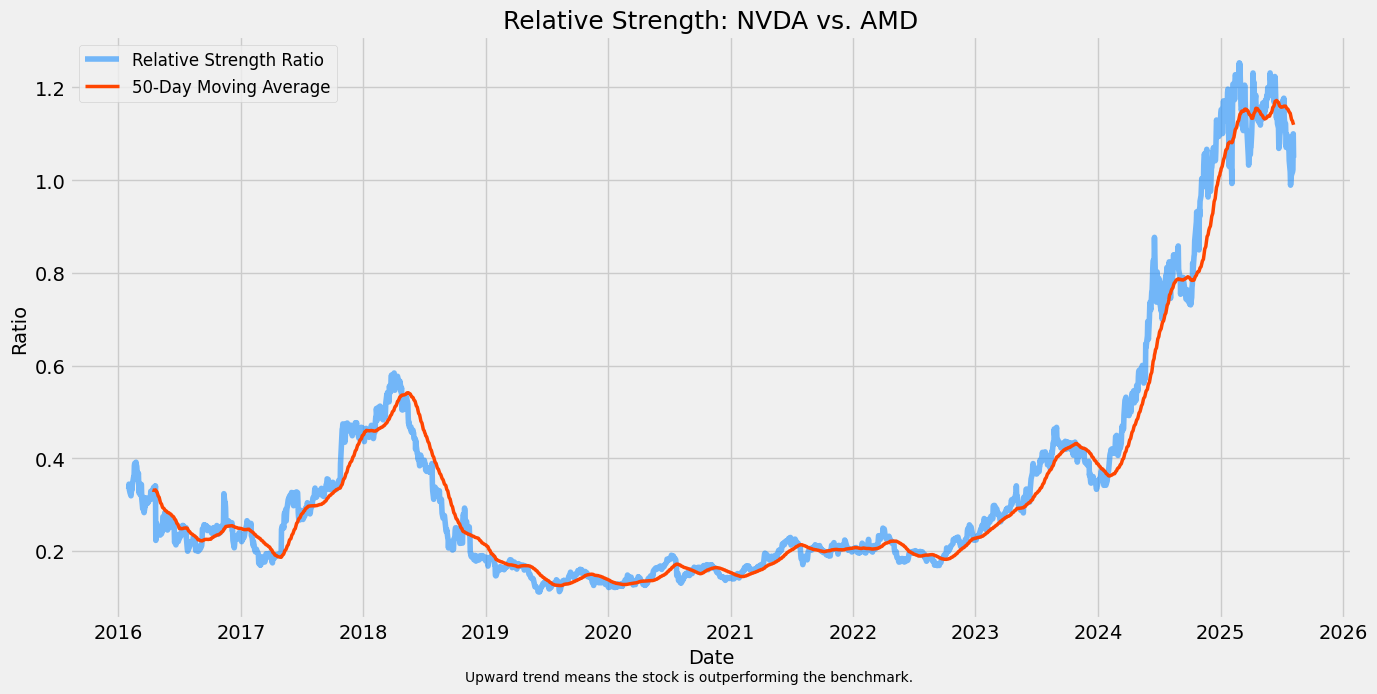

In [1]:
# project_relative_strength.py
import pandas as pd
import matplotlib.pyplot as plt

# --- Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# The stock you want to analyze
STOCK_TICKER = 'NVDA'
# The benchmark to compare against (e.g., SPY for S&P 500, or a competitor like AMD)
BENCHMARK_TICKER = 'AMD'
# Moving average window for the trendline
RS_MA_WINDOW = 50

# --- Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME, parse_dates=['Date'])
    df['Date'] = df['Date'].dt.tz_localize(None)
    print("File loaded. Analyzing relative strength...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Filter for the stock and benchmark tickers
rs_df = df[df['Ticker'].isin([STOCK_TICKER, BENCHMARK_TICKER])]
price_pivot = rs_df.pivot_table(index='Date', columns='Ticker', values='Close').dropna()

# --- Analysis ---
# Calculate the Relative Strength Ratio
relative_strength = price_pivot[STOCK_TICKER] / price_pivot[BENCHMARK_TICKER]
# Calculate a moving average of the ratio to identify the trend
rs_ma = relative_strength.rolling(window=RS_MA_WINDOW).mean()

# --- Visualization ---
print("Generating plot...")
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14, 7))

plt.plot(relative_strength.index, relative_strength, label='Relative Strength Ratio', color='dodgerblue', alpha=0.6)
plt.plot(rs_ma.index, rs_ma, label=f'{RS_MA_WINDOW}-Day Moving Average', color='orangered', linewidth=2.5)

plt.title(f'Relative Strength: {STOCK_TICKER} vs. {BENCHMARK_TICKER}', fontsize=18)
plt.ylabel('Ratio', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.figtext(0.5, 0.01, "Upward trend means the stock is outperforming the benchmark.", ha="center", fontsize=10)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

An error occurred: Can only use .dt accessor with datetimelike values
Generating plot...


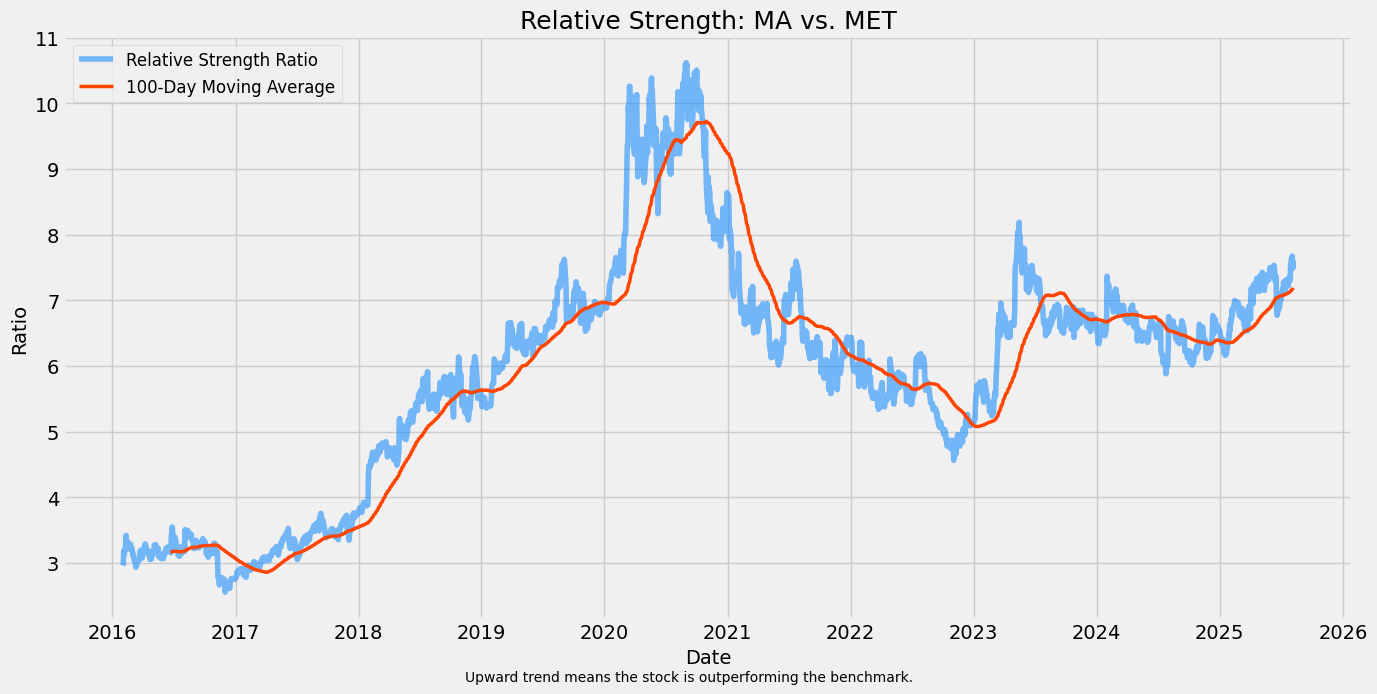

In [1]:
# project_relative_strength.py
import pandas as pd
import matplotlib.pyplot as plt

# --- Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# The stock you want to analyze
STOCK_TICKER = 'MA'
# The benchmark to compare against (e.g., SPY for S&P 500, or a competitor like AMD)
BENCHMARK_TICKER = 'MET'
# Moving average window for the trendline
RS_MA_WINDOW = 100

# --- Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME, parse_dates=['Date'])
    df['Date'] = df['Date'].dt.tz_localize(None)
    print("File loaded. Analyzing relative strength...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Filter for the stock and benchmark tickers
rs_df = df[df['Ticker'].isin([STOCK_TICKER, BENCHMARK_TICKER])]
price_pivot = rs_df.pivot_table(index='Date', columns='Ticker', values='Close').dropna()

# --- Analysis ---
# Calculate the Relative Strength Ratio
relative_strength = price_pivot[STOCK_TICKER] / price_pivot[BENCHMARK_TICKER]
# Calculate a moving average of the ratio to identify the trend
rs_ma = relative_strength.rolling(window=RS_MA_WINDOW).mean()

# --- Visualization ---
print("Generating plot...")
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14, 7))

plt.plot(relative_strength.index, relative_strength, label='Relative Strength Ratio', color='dodgerblue', alpha=0.6)
plt.plot(rs_ma.index, rs_ma, label=f'{RS_MA_WINDOW}-Day Moving Average', color='orangered', linewidth=2.5)

plt.title(f'Relative Strength: {STOCK_TICKER} vs. {BENCHMARK_TICKER}', fontsize=18)
plt.ylabel('Ratio', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.figtext(0.5, 0.01, "Upward trend means the stock is outperforming the benchmark.", ha="center", fontsize=10)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#The Minimum Variance Portfolio

An error occurred: Can only use .dt accessor with datetimelike values
Running 10000 portfolio simulations...

--- Minimum Variance Portfolio ---
Annualized Return: 13.84%
Annualized Volatility: 14.80%

--- Max Sharpe Ratio Portfolio ---
Annualized Return: 23.65%
Annualized Volatility: 18.84%

Generating Efficient Frontier plot...


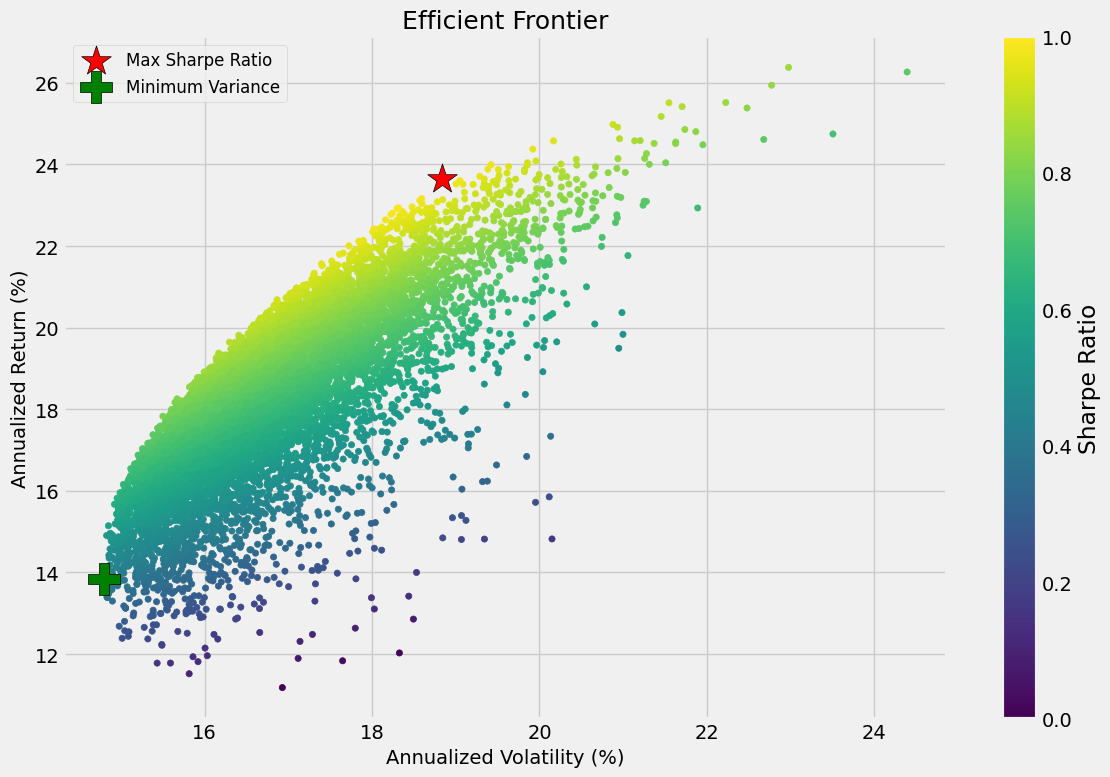

In [1]:
# project_min_variance.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# Define your portfolio of tickers
PORTFOLIO_TICKERS = ['AAPL', 'MSFT', 'JNJ', 'WMT', 'PG', 'XOM']
NUM_PORTFOLIOS = 10000
RISK_FREE_RATE = 0.02

# --- 2. Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME, parse_dates=['Date'])
    df['Date'] = df['Date'].dt.tz_localize(None)
    print("File loaded. Preparing stock returns data...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Create a pivot table of daily returns for each stock
stock_returns = df[df['Ticker'].isin(PORTFOLIO_TICKERS)].pivot_table(
    index='Date', columns='Ticker', values='Daily_Return'
).dropna()

mean_returns = stock_returns.mean()
cov_matrix = stock_returns.cov()
num_assets = len(mean_returns)
trading_days = 252

# --- 3. Run Monte Carlo Simulation ---
print(f"Running {NUM_PORTFOLIOS} portfolio simulations...")
results_data = np.zeros((3, NUM_PORTFOLIOS))
weights_list = []

for i in range(NUM_PORTFOLIOS):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_list.append(weights)

    portfolio_return = np.sum(mean_returns * weights) * trading_days
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * trading_days, weights)))
    sharpe_ratio = (portfolio_return - RISK_FREE_RATE) / portfolio_volatility

    results_data[0,i] = portfolio_return
    results_data[1,i] = portfolio_volatility
    results_data[2,i] = sharpe_ratio

results_df = pd.DataFrame(results_data.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])

# --- 4. Identify Optimal & Minimum Variance Portfolios ---
# Locate Max Sharpe Ratio Portfolio (best risk-adjusted return)
max_sharpe_portfolio = results_df.iloc[results_df['Sharpe Ratio'].idxmax()]
# --- NEW: Locate Minimum Variance Portfolio (lowest risk) ---
min_variance_portfolio = results_df.iloc[results_df['Volatility'].idxmin()]

print("\n--- Minimum Variance Portfolio ---")
print(f"Annualized Return: {min_variance_portfolio['Return']:.2%}")
print(f"Annualized Volatility: {min_variance_portfolio['Volatility']:.2%}")
print("\n--- Max Sharpe Ratio Portfolio ---")
print(f"Annualized Return: {max_sharpe_portfolio['Return']:.2%}")
print(f"Annualized Volatility: {max_sharpe_portfolio['Volatility']:.2%}\n")


# --- 5. Visualization ---
print("Generating Efficient Frontier plot...")
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
plt.scatter(results_df['Volatility']*100, results_df['Return']*100, c=results_df['Sharpe Ratio'], cmap='viridis', s=20)
# Highlight the two key portfolios
plt.scatter(max_sharpe_portfolio['Volatility']*100, max_sharpe_portfolio['Return']*100, marker='*', color='r', s=500, edgecolors='black', label='Max Sharpe Ratio')
plt.scatter(min_variance_portfolio['Volatility']*100, min_variance_portfolio['Return']*100, marker='P', color='g', s=500, edgecolors='black', label='Minimum Variance')

plt.title('Efficient Frontier', fontsize=18)
plt.xlabel('Annualized Volatility (%)', fontsize=14)
plt.ylabel('Annualized Return (%)', fontsize=14)
plt.colorbar(label='Sharpe Ratio')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

risk free rate and num portfolio adjusted

An error occurred: Can only use .dt accessor with datetimelike values
Running 100000 portfolio simulations...

--- Minimum Variance Portfolio ---
Annualized Return: 14.16%
Annualized Volatility: 14.78%

--- Max Sharpe Ratio Portfolio ---
Annualized Return: 24.21%
Annualized Volatility: 19.26%

Generating Efficient Frontier plot...


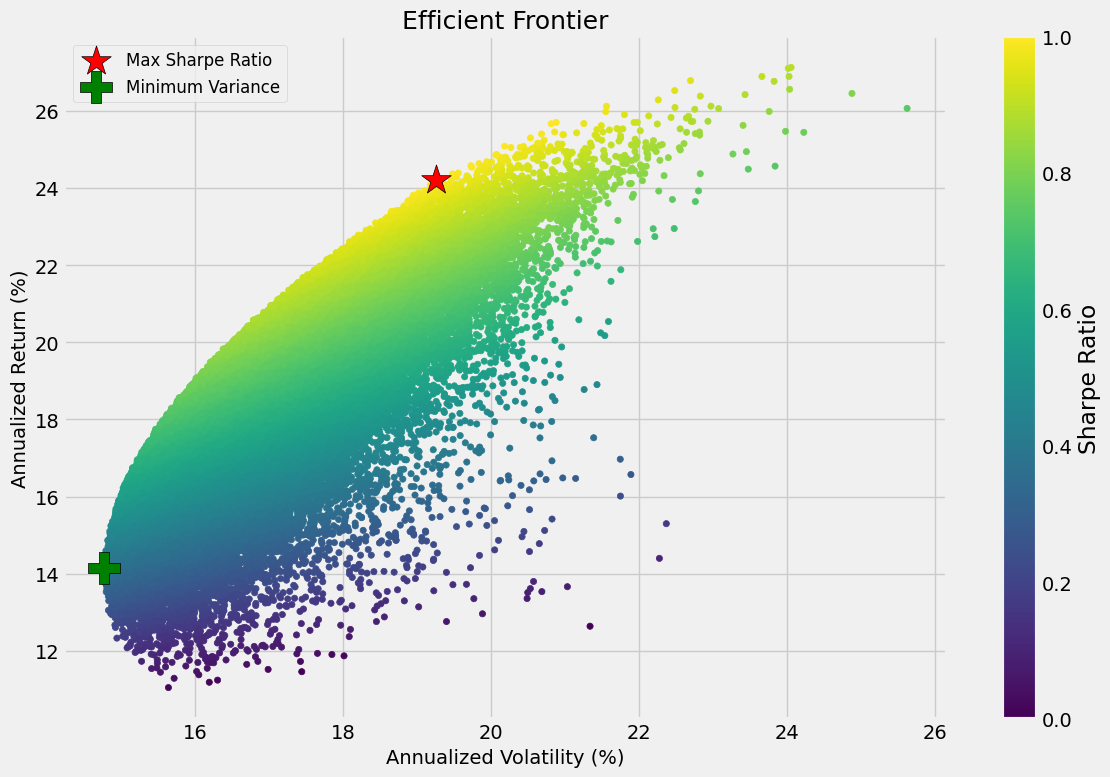

In [1]:
# project_min_variance.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# Define your portfolio of tickers
PORTFOLIO_TICKERS = ['AAPL', 'MSFT', 'JNJ', 'WMT', 'PG', 'XOM']
NUM_PORTFOLIOS = 100000
RISK_FREE_RATE = 0.06

# --- 2. Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME, parse_dates=['Date'])
    df['Date'] = df['Date'].dt.tz_localize(None)
    print("File loaded. Preparing stock returns data...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Create a pivot table of daily returns for each stock
stock_returns = df[df['Ticker'].isin(PORTFOLIO_TICKERS)].pivot_table(
    index='Date', columns='Ticker', values='Daily_Return'
).dropna()

mean_returns = stock_returns.mean()
cov_matrix = stock_returns.cov()
num_assets = len(mean_returns)
trading_days = 252

# --- 3. Run Monte Carlo Simulation ---
print(f"Running {NUM_PORTFOLIOS} portfolio simulations...")
results_data = np.zeros((3, NUM_PORTFOLIOS))
weights_list = []

for i in range(NUM_PORTFOLIOS):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_list.append(weights)

    portfolio_return = np.sum(mean_returns * weights) * trading_days
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * trading_days, weights)))
    sharpe_ratio = (portfolio_return - RISK_FREE_RATE) / portfolio_volatility

    results_data[0,i] = portfolio_return
    results_data[1,i] = portfolio_volatility
    results_data[2,i] = sharpe_ratio

results_df = pd.DataFrame(results_data.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])

# --- 4. Identify Optimal & Minimum Variance Portfolios ---
# Locate Max Sharpe Ratio Portfolio (best risk-adjusted return)
max_sharpe_portfolio = results_df.iloc[results_df['Sharpe Ratio'].idxmax()]
# --- NEW: Locate Minimum Variance Portfolio (lowest risk) ---
min_variance_portfolio = results_df.iloc[results_df['Volatility'].idxmin()]

print("\n--- Minimum Variance Portfolio ---")
print(f"Annualized Return: {min_variance_portfolio['Return']:.2%}")
print(f"Annualized Volatility: {min_variance_portfolio['Volatility']:.2%}")
print("\n--- Max Sharpe Ratio Portfolio ---")
print(f"Annualized Return: {max_sharpe_portfolio['Return']:.2%}")
print(f"Annualized Volatility: {max_sharpe_portfolio['Volatility']:.2%}\n")


# --- 5. Visualization ---
print("Generating Efficient Frontier plot...")
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
plt.scatter(results_df['Volatility']*100, results_df['Return']*100, c=results_df['Sharpe Ratio'], cmap='viridis', s=20)
# Highlight the two key portfolios
plt.scatter(max_sharpe_portfolio['Volatility']*100, max_sharpe_portfolio['Return']*100, marker='*', color='r', s=500, edgecolors='black', label='Max Sharpe Ratio')
plt.scatter(min_variance_portfolio['Volatility']*100, min_variance_portfolio['Return']*100, marker='P', color='g', s=500, edgecolors='black', label='Minimum Variance')

plt.title('Efficient Frontier', fontsize=18)
plt.xlabel('Annualized Volatility (%)', fontsize=14)
plt.ylabel('Annualized Return (%)', fontsize=14)
plt.colorbar(label='Sharpe Ratio')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#Risk Parity Portfolios

An error occurred: Can only use .dt accessor with datetimelike values
Optimizing for Risk Parity portfolio...

--- Risk Parity Portfolio ---
Optimal Weights:
Ticker
AAPL    12.02%
JNJ     19.30%
MSFT    13.79%
PG      19.04%
WMT     18.82%
XOM     17.02%
dtype: object

Risk Contribution per Asset:
Ticker
AAPL    0.0252
JNJ     0.0239
MSFT    0.0268
PG      0.0252
WMT     0.0262
XOM     0.0289
dtype: object
(Note: Risk contributions should be nearly equal)
---------------------------



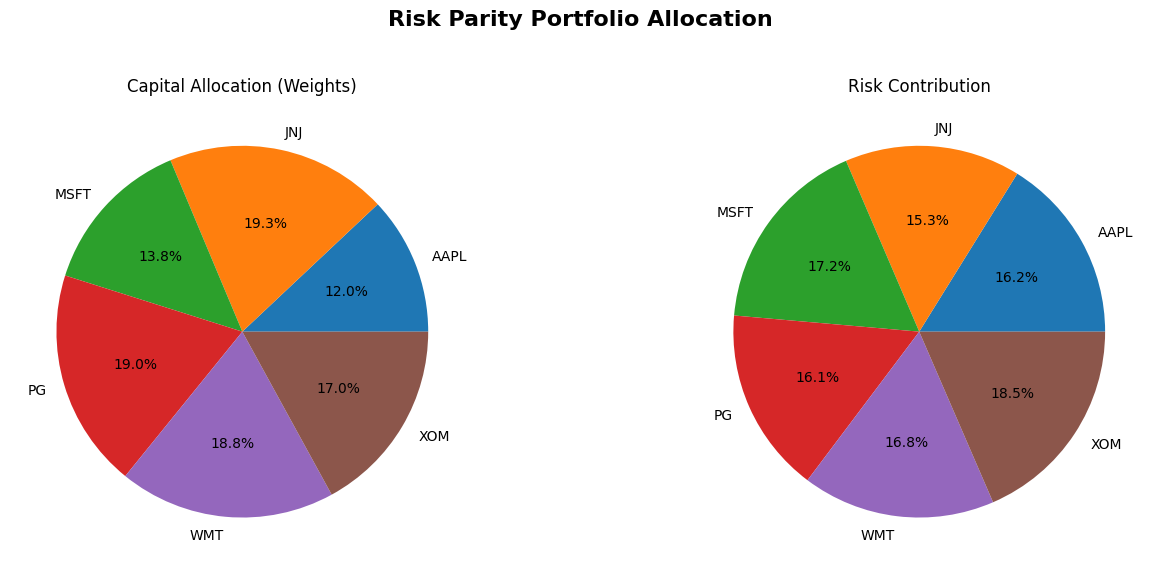

In [1]:
# project_risk_parity.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# --- 1. Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
PORTFOLIO_TICKERS = ['AAPL', 'MSFT', 'JNJ', 'WMT', 'PG', 'XOM']

# --- 2. Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME, parse_dates=['Date'])
    df['Date'] = df['Date'].dt.tz_localize(None)
    print("File loaded. Preparing data...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

stock_returns = df[df['Ticker'].isin(PORTFOLIO_TICKERS)].pivot_table(
    index='Date', columns='Ticker', values='Daily_Return'
).dropna()
cov_matrix = stock_returns.cov() * 252 # Annualized covariance
num_assets = len(stock_returns.columns)

# --- 3. Risk Parity Optimization ---
def calculate_risk_contribution(weights, cov_matrix):
    """Calculates the risk contribution of each asset in the portfolio."""
    weights = np.array(weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    # Marginal Contribution to Risk
    mcr = np.dot(cov_matrix, weights) / portfolio_volatility
    # Risk Contribution
    rc = weights * mcr
    return rc

def risk_parity_objective(weights, cov_matrix):
    """Objective function for the optimizer.
    We want to minimize the variance of the risk contributions."""
    risk_contributions = calculate_risk_contribution(weights, cov_matrix)
    # The goal is for all risk contributions to be equal.
    # So, the variance between them should be zero.
    return np.var(risk_contributions)

print("Optimizing for Risk Parity portfolio...")
# --- Optimization Constraints & Bounds ---
# All weights must sum to 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
# Each weight must be between 0 and 1 (no short selling)
bounds = tuple((0, 1) for _ in range(num_assets))
# Initial guess (equal weights)
initial_weights = np.array([1/num_assets] * num_assets)

# Run the optimizer
result = minimize(fun=risk_parity_objective,
                  x0=initial_weights,
                  args=(cov_matrix,),
                  method='SLSQP',
                  bounds=bounds,
                  constraints=constraints)

# The optimal weights found by the optimizer
risk_parity_weights = result.x

# --- 4. Display Results ---
print("\n--- Risk Parity Portfolio ---")
print("Optimal Weights:")
weights_series = pd.Series(risk_parity_weights, index=stock_returns.columns)
print(weights_series.apply(lambda x: f'{x:.2%}'))
print("\nRisk Contribution per Asset:")
risk_contribution_series = pd.Series(calculate_risk_contribution(risk_parity_weights, cov_matrix), index=stock_returns.columns)
print(risk_contribution_series.apply(lambda x: f'{x:.4f}'))
print("(Note: Risk contributions should be nearly equal)")
print("---------------------------\n")

# --- 5. Visualization ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
weights_series.plot(kind='pie', ax=ax1, autopct='%1.1f%%', title='Capital Allocation (Weights)')
risk_contribution_series.plot(kind='pie', ax=ax2, autopct='%1.1f%%', title='Risk Contribution')
ax1.set_ylabel('')
ax2.set_ylabel('')
plt.suptitle('Risk Parity Portfolio Allocation', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#The Black-Litterman Model

#multifactor model

In [1]:
# project_multifactor_model.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# Define the factors to use. 'asc=True' means lower is better (e.g., low P/E).
FACTORS = {
    'PE_Ratio': {'asc': True, 'weight': 0.5}, # Value factor
    'Volatility_10D': {'asc': True, 'weight': 0.5} # Quality/Stability factor
}
NUM_QUANTILES = 5 # Number of portfolios to form (5 is standard for quintiles)
# --- FIX: Updated 'M' to 'ME' (Month End) ---
REBALANCE_FREQ = 'ME' # Rebalance monthly.

# --- 2. Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME)
    # --- FIX: More robust date conversion ---
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.dropna(subset=['Date'], inplace=True)
    print("File loaded. Backtesting multi-factor model...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Set the clean 'Date' column as the index
df.set_index('Date', inplace=True)

# --- 3. Backtesting Loop ---
# Get the list of rebalancing dates (month-ends)
rebalance_dates = df.resample(REBALANCE_FREQ).last().index
quintile_returns = []

for i in range(len(rebalance_dates) - 1):
    start_date = rebalance_dates[i]
    end_date = rebalance_dates[i+1]

    # Get the latest factor data at the start of the period
    # Use .asof to get the last valid data point on or before the start_date
    period_data = df.loc[df.index <= start_date].groupby('Ticker').last().dropna(subset=FACTORS.keys())

    if period_data.empty:
        continue

    # --- Ranking and Scoring ---
    composite_score = pd.Series(0.0, index=period_data.index)
    for factor, params in FACTORS.items():
        rank = period_data[factor].rank(ascending=params['asc'], pct=True)
        composite_score += rank * params['weight']

    period_data['composite_score'] = composite_score

    # --- Form Portfolios (Quintiles) ---
    period_data['quintile'] = pd.qcut(period_data['composite_score'], NUM_QUANTILES,
                                      labels=False, duplicates='drop') + 1

    # --- Calculate Returns for the Next Period ---
    next_period_df = df.loc[start_date:end_date]
    # Map the quintiles to the tickers for the next period
    quintile_map = period_data['quintile']
    next_period_df = next_period_df.join(quintile_map, on='Ticker')

    # Calculate the equal-weighted return for each quintile portfolio
    period_quintile_returns = next_period_df.groupby('quintile')['Daily_Return'].mean()
    quintile_returns.append(period_quintile_returns)

# --- 4. Analyze and Visualize Results ---
returns_df = pd.DataFrame(quintile_returns, index=rebalance_dates[1:])
returns_df.columns = [f'Quintile {int(c)}' for c in returns_df.columns]
if NUM_QUANTILES in returns_df.columns:
    returns_df.rename(columns={NUM_QUANTILES: f'Quintile {NUM_QUANTILES} (Top Score)'}, inplace=True)

cumulative_performance = (1 + returns_df.fillna(0)).cumprod()

print("\n--- Backtest Results ---")
cagr = (cumulative_performance.iloc[-1] ** (12 / len(cumulative_performance))) - 1
print("Compound Annual Growth Rate (CAGR):")
print(cagr.apply(lambda x: f'{x:.2%}'))
print("--------------------------\n")

# Plot the cumulative performance
print("Generating performance chart...")
plt.style.use('fivethirtyeight')
cumulative_performance.plot(figsize=(14, 8), linewidth=2.5)
plt.title('Multi-Factor Model Performance by Quintile', fontsize=18)
plt.ylabel('Growth of $1', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(title='Portfolio Quintile')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2347491865.py:21: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


File loaded. Backtesting multi-factor model...


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

Analyze Intraday Patterns (VWAP)
Since you have intraday data, we could also do analyses that are specifically designed for it. A classic example is calculating the Volume Weighted Average Price (VWAP).

What is VWAP? It's the true average price a stock traded at throughout the day, weighted by trading volume. Traders use it as a benchmark to see if they got a good price. A stock trading above its VWAP is often seen as bullish for the day, while one trading below is seen as bearish.

# Load and Prepare Your Data

In [8]:
import pandas as pd
import numpy as np

# Load your dataset
# Make sure the 'Date' column is parsed correctly
try:
    df = pd.read_csv('/content/sp500_full_dataset.csv', parse_dates=['Date'])
except FileNotFoundError:
    print("Please rename your data file to 'your_dataset.csv' or update the path.")
    # As a placeholder, let's create a sample dataframe for demonstration
    # In your case, this block will not run if your file is found.
    dates = pd.to_datetime(pd.date_range('2023-01-01', periods=100))
    tickers = ['AAPL', 'MSFT', 'JPM', 'PFE']
    sectors = ['Technology', 'Technology', 'Financials', 'Health Care']
    data = []
    for i, ticker in enumerate(tickers):
        price = 100 + i*10 + np.random.randn(100).cumsum()
        temp_df = pd.DataFrame({
            'Date': dates,
            'Ticker': ticker,
            'Close': price,
            'Market_Cap': (1 + i) * 1e12,
            'RSI_14': 50 + np.random.randn(100) * 10,
            'Sector': sectors[i]
        })
        data.append(temp_df)
    df = pd.concat(data)
    df['Daily_Return'] = df.groupby('Ticker')['Close'].pct_change()
    df.loc[df['Ticker'] == 'MSFT', 'RSI_14'] = 30 # Forcing a condition for our view
    df.dropna(inplace=True)


# --- Data Preparation ---

# Set Date as the index
df.set_index('Date', inplace=True)

# Create the pivotal returns dataframe (Date x Ticker)
# This is a critical step for most financial analysis
returns_df = df.pivot(columns='Ticker', values='Daily_Return')
returns_df.dropna(inplace=True) # Drop dates where not all stocks have returns

# Get a list of the tickers we are working with
tickers = returns_df.columns.tolist()
print("Tickers in portfolio:", tickers)

# Get the latest data for each ticker for our views
latest_data = df.groupby('Ticker').last()
print("\nLatest data for each ticker:")
print(latest_data[['Sector', 'Market_Cap', 'RSI_14']])

Tickers in portfolio: ['A', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APO', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBY', 'BDX', 'BEN', 'BF-B', 'BG', 'BIIB', 'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRK-B', 'BRO', 'BSX', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CEG', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COIN', 'COO', 'COP', 'COR', 'COST', 'CPAY', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CRWD', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTRA', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DASH', 'DAY', 'DD', 'DDOG', 'DE', 'DECK', 'DELL', 'DG', 'DGX', 'DHI', 'D

#Calculate Market-Implied Returns (
Pi) and Covariance (
Sigma)

In [14]:
# Instead of: S = risk_models.sample_cov(returns_df, frequency=252)
# Use this:
S = returns_df.cov() * 252

In [15]:
import pandas as pd
import numpy as np

# Assume 'returns_df' and 'latest_data' are already defined from the previous steps

# --- 1. Calculate the Annualized Covariance Matrix (S) ---
# This replaces `risk_models.sample_cov`
print("Calculating annualized covariance matrix S...")
S = returns_df.cov() * 252

# --- 2. Calculate the Market-Implied Equilibrium Returns (pi) ---
# This replaces `market_implied_prior_returns`

# Get the latest market caps for each ticker
mcaps = latest_data['Market_Cap']

# a) Calculate market-cap weights (w_mkt)
w_mkt = mcaps / mcaps.sum()

# b) Set the risk aversion parameter (delta)
delta = 2.5

# c) Calculate Pi using the formula: Pi = delta * S * w_mkt
# .dot() is used for matrix multiplication
pi = delta * S.dot(w_mkt)


# --- Results ---
print("\nAnnualized Covariance Matrix (S):")
print(S.head()) # Print first 5 rows

print("\nMarket-Implied Equilibrium Returns (Pi):")
print(pi)

Calculating annualized covariance matrix S...

Annualized Covariance Matrix (S):
Ticker         A      AAPL      ABBV      ABNB       ABT      ACGL       ACN  \
Ticker                                                                         
A       0.089839  0.036981  0.030096  0.040847  0.012018  0.016047  0.035138   
AAPL    0.036981  0.096895  0.016677  0.055329  0.004586  0.015510  0.027917   
ABBV    0.030096  0.016677  0.071630  0.007588  0.018624  0.020806  0.010290   
ABNB    0.040847  0.055329  0.007588  0.153961  0.000669  0.014886  0.038356   
ABT     0.012018  0.004586  0.018624  0.000669  0.045332  0.016492  0.011140   

Ticker      ADBE       ADI       ADM  ...        WY      WYNN       XEL  \
Ticker                                ...                                 
A       0.035171  0.062527  0.021447  ...  0.039321  0.050370  0.006847   
AAPL    0.039590  0.068823  0.022133  ...  0.028241  0.052569  0.005514   
ABBV    0.011102  0.019506  0.017468  ...  0.031733  0.013

In [19]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 3.3 MB/s eta 0:00:00


Dataset loaded successfully! ✅

--- Running Strategy 1: Regime Detection ---
HMM model trained for AAPL.


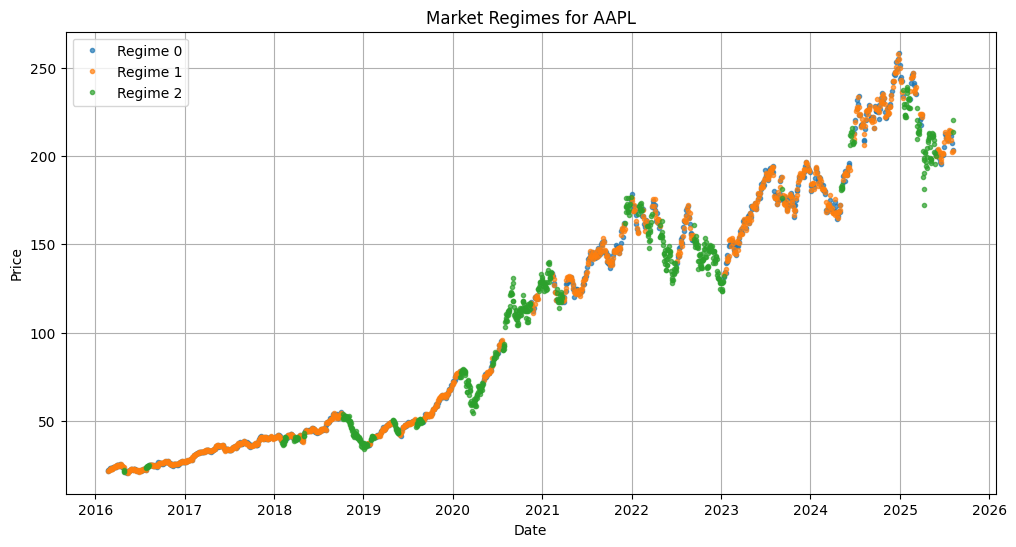


--- Running Strategy 2: Pairs Trading ---
Pairs analysis complete for KO and PEP.


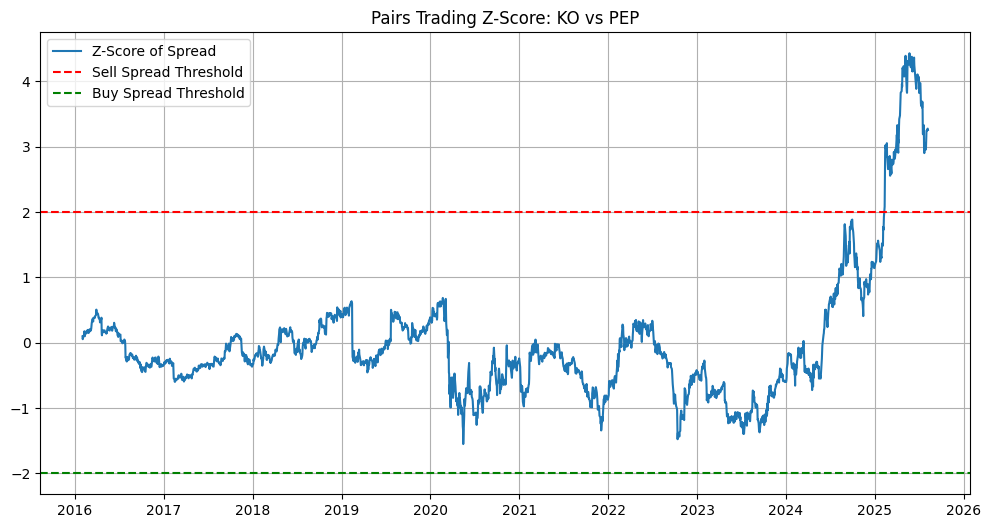


--- Running Strategy 3: Option Volatility Analysis ---
Historical volatility calculated for AAPL.


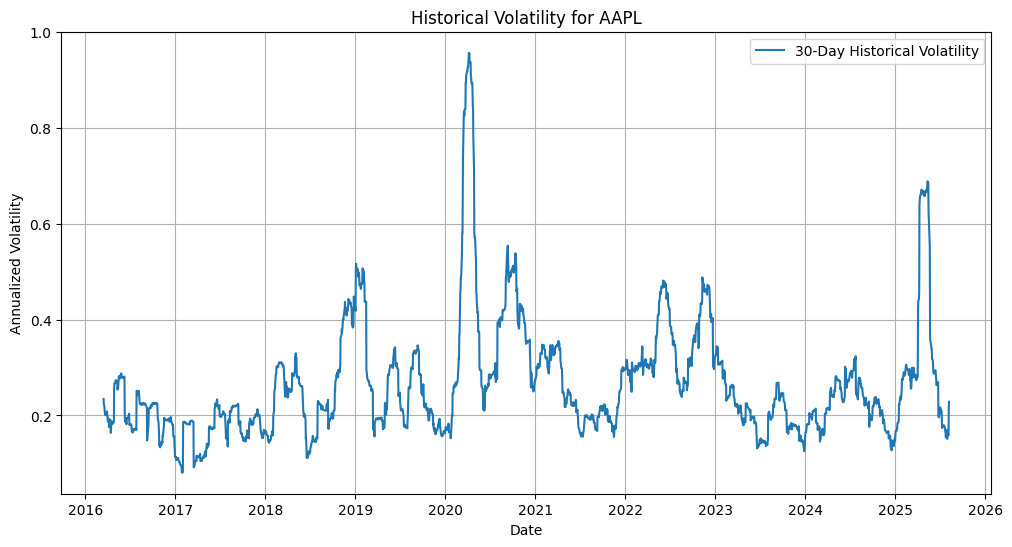

Next step would be to compare this to 'Implied Volatility' from a live data source.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from hmmlearn import hmm
import warnings

warnings.filterwarnings('ignore')

# --- Step 1: Load Your Dataset ---
# Replace this with the actual path to your file.
file_path = "/content/sp500_full_dataset.csv"

try:
    df = pd.read_csv(file_path, parse_dates=['Date'])
    print("Dataset loaded successfully! ✅")
    # Set the date as the index for time-series analysis
    df.set_index('Date', inplace=True)
except Exception as e:
    print(f"Error loading data: {e}")
    # Exit if the data can't be loaded
    exit()

# --- Strategy 1: Regime Detection with Hidden Markov Models (HMM) ---
print("\n--- Running Strategy 1: Regime Detection ---")
# --- Select an asset for Regime Detection (e.g., a market index or major stock) ---
# --- PLEASE CHANGE 'SPY' to a ticker that exists in your dataset ---
regime_ticker = 'AAPL' # <--- CHANGE THIS

if regime_ticker in df['Ticker'].unique():
    # Prepare data for the selected ticker
    regime_df = df[df['Ticker'] == regime_ticker].copy()
    regime_df['Return'] = regime_df['Close'].pct_change()
    regime_df['Volatility'] = regime_df['Return'].rolling(10).std()
    regime_df.dropna(inplace=True)

    X_hmm = regime_df[['Return', 'Volatility']].values

    # Train the HMM Model (assuming 3 regimes)
    n_components = 3
    model_hmm = hmm.GaussianHMM(n_components=n_components, covariance_type="full", n_iter=1000, random_state=42)
    model_hmm.fit(X_hmm)
    hidden_states = model_hmm.predict(X_hmm)
    regime_df['Regime'] = hidden_states

    print(f"HMM model trained for {regime_ticker}.")

    # Visualize the results
    plt.figure(figsize=(12, 6))
    for i in range(n_components):
        mask = regime_df['Regime'] == i
        plt.plot(regime_df.index[mask], regime_df['Close'][mask], '.', label=f'Regime {i}', alpha=0.7)
    plt.title(f'Market Regimes for {regime_ticker}')
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"Ticker '{regime_ticker}' not found. Skipping Regime Detection.")


# --- Strategy 2: Pairs Trading ---
print("\n--- Running Strategy 2: Pairs Trading ---")
# --- Select two tickers you believe are correlated ---
# --- PLEASE CHANGE these to tickers that exist in your dataset ---
pair1_ticker = 'KO'   # <--- CHANGE THIS
pair2_ticker = 'PEP'  # <--- CHANGE THIS

if pair1_ticker in df['Ticker'].unique() and pair2_ticker in df['Ticker'].unique():
    # Prepare data for the pair
    pair1_price = df[df['Ticker'] == pair1_ticker]['Close']
    pair2_price = df[df['Ticker'] == pair2_ticker]['Close']

    # Align the data on the same dates
    pairs_df = pd.concat([pair1_price, pair2_price], axis=1, keys=[pair1_ticker, pair2_ticker])
    pairs_df.dropna(inplace=True)

    # Calculate spread and test for cointegration
    X_coint = sm.add_constant(pairs_df[pair2_ticker])
    model_coint = sm.OLS(pairs_df[pair1_ticker], X_coint).fit()
    hedge_ratio = model_coint.params[1]
    spread = pairs_df[pair1_ticker] - hedge_ratio * pairs_df[pair2_ticker]

    # Calculate Z-score for trading signals
    z_score = (spread - spread.mean()) / spread.std()

    print(f"Pairs analysis complete for {pair1_ticker} and {pair2_ticker}.")

    # Visualize the spread's Z-score
    plt.figure(figsize=(12, 6))
    plt.plot(z_score.index, z_score, label='Z-Score of Spread')
    plt.axhline(2.0, color='red', linestyle='--', label='Sell Spread Threshold')
    plt.axhline(-2.0, color='green', linestyle='--', label='Buy Spread Threshold')
    plt.title(f'Pairs Trading Z-Score: {pair1_ticker} vs {pair2_ticker}')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"One or both tickers for pairs trading not found. Skipping.")


# --- Strategy 3: Option Volatility Analysis ---
print("\n--- Running Strategy 3: Option Volatility Analysis ---")
# --- Select a ticker for volatility analysis ---
# --- PLEASE CHANGE this to a ticker that exists in your dataset ---
vol_ticker = 'AAPL' # <--- CHANGE THIS

if vol_ticker in df['Ticker'].unique():
    # Prepare data
    vol_df = df[df['Ticker'] == vol_ticker].copy()
    vol_df['Return'] = np.log(vol_df['Close'] / vol_df['Close'].shift(1))

    # Calculate 30-day annualized historical volatility
    vol_df['Historical_Volatility'] = vol_df['Return'].rolling(30).std() * np.sqrt(252)
    vol_df.dropna(inplace=True)

    print(f"Historical volatility calculated for {vol_ticker}.")

    # Visualize the historical volatility
    plt.figure(figsize=(12, 6))
    plt.plot(vol_df.index, vol_df['Historical_Volatility'], label='30-Day Historical Volatility')
    plt.title(f'Historical Volatility for {vol_ticker}')
    plt.ylabel('Annualized Volatility')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)
    plt.show()
    # Note: To complete the analysis, you would need to source 'Implied Volatility'
    # data from an external provider and plot it against this.
    print("Next step would be to compare this to 'Implied Volatility' from a live data source.")
else:
    print(f"Ticker '{vol_ticker}' not found. Skipping Volatility Analysis.")

In [3]:
!pip install matplotlib

Dataset loaded successfully! ✅

Found 38 dividend events for AAPL.

--- Event Study Results ---
Average Abnormal Return (AAR) around the event: -0.000281
Cumulative Abnormal Return (CAR) over the window: -0.080145
T-statistic: -0.2969
P-value: 0.7667
Result is not statistically significant: We cannot conclude the event had an impact.


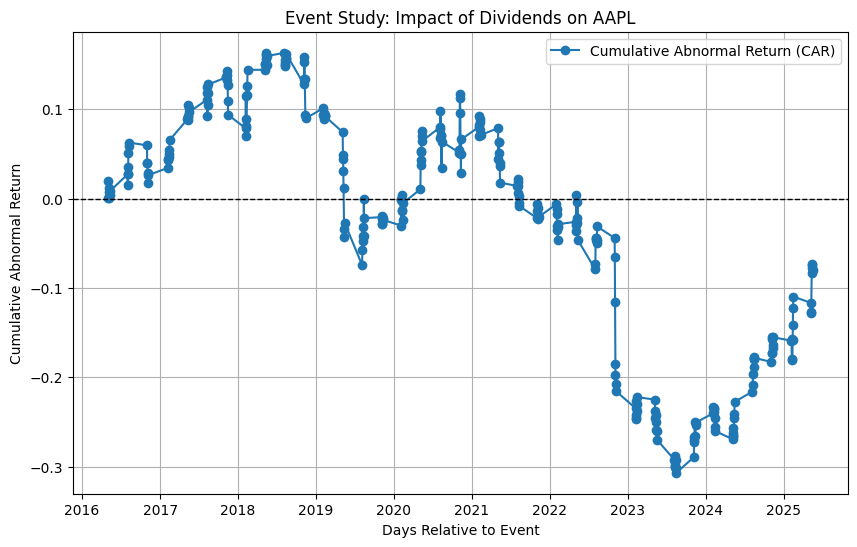

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

# --- Step 1: Load Your Dataset ---
# Replace this with the actual path to your file.
file_path = "/content/sp500_full_dataset.csv"

try:
    df = pd.read_csv(file_path, parse_dates=['Date'])
    print("Dataset loaded successfully! ✅")
    df.set_index('Date', inplace=True)
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# --- Step 2: Prepare Data and Identify Events ---
# We need a market benchmark. Let's assume one of your tickers is a market ETF like 'SPY'.
# --- PLEASE CHANGE these tickers to ones that exist in your dataset ---
market_ticker = 'BA'       # <--- CHANGE THIS (Your market benchmark)
company_ticker = 'AAPL'     # <--- CHANGE THIS (The company to study)

if market_ticker not in df['Ticker'].unique() or company_ticker not in df['Ticker'].unique():
    print("Market or company ticker not found. Please update the ticker symbols.")
    exit()

# Isolate the data for the company and the market
market_returns = df[df['Ticker'] == market_ticker]['Daily_Return']
company_df = df[df['Ticker'] == company_ticker].copy()

# Identify event dates (where a dividend was announced/paid)
# We look for non-zero values in the 'Dividends' column.
event_dates = company_df[company_df['Dividends'] > 0].index

if len(event_dates) == 0:
    print(f"No dividend events found for {company_ticker}. Cannot proceed.")
    exit()

print(f"\nFound {len(event_dates)} dividend events for {company_ticker}.")

# --- Step 3: Loop Through Each Event and Calculate Abnormal Returns ---
abnormal_returns_all_events = []
estimation_window_len = 120
event_window_len = 5 # 5 days before and 5 days after

for event_date in event_dates:
    # --- Define Estimation and Event Windows for this event ---
    estimation_start = event_date - pd.Timedelta(days=estimation_window_len + event_window_len)
    estimation_end = event_date - pd.Timedelta(days=event_window_len + 1)

    event_start = event_date - pd.Timedelta(days=event_window_len)
    event_end = event_date + pd.Timedelta(days=event_window_len)

    # Get data for the estimation window
    estimation_data = pd.concat([
        company_df.loc[estimation_start:estimation_end]['Daily_Return'],
        market_returns.loc[estimation_start:estimation_end]
    ], axis=1, keys=['Company', 'Market']).dropna()

    if len(estimation_data) < 20: # Skip if not enough data
        continue

    # --- Build the Market Model ---
    # OLS Regression: CompanyReturn = alpha + beta * MarketReturn
    X = sm.add_constant(estimation_data['Market'])
    y = estimation_data['Company']
    market_model = sm.OLS(y, X).fit()
    alpha, beta = market_model.params

    # --- Calculate Abnormal Returns in the Event Window ---
    event_data = pd.concat([
        company_df.loc[event_start:event_end]['Daily_Return'],
        market_returns.loc[event_start:event_end]
    ], axis=1, keys=['Company', 'Market']).dropna()

    event_data['Expected_Return'] = alpha + beta * event_data['Market']
    event_data['Abnormal_Return'] = event_data['Company'] - event_data['Expected_Return']

    # Store the results
    abnormal_returns_all_events.append(event_data['Abnormal_Return'])

# --- Step 4: Aggregate Results and Test for Significance ---
if not abnormal_returns_all_events:
    print("Could not calculate abnormal returns for any event.")
    exit()

# Combine all abnormal returns into a single DataFrame
results_df = pd.concat(abnormal_returns_all_events, axis=1)

# Calculate Cumulative Abnormal Return (CAR) and Average Abnormal Return (AAR)
aar = results_df.mean(axis=1)
car = aar.cumsum()

# Perform a t-test to see if the abnormal returns are significant
t_stat, p_value = stats.ttest_1samp(aar, 0)

print("\n--- Event Study Results ---")
print(f"Average Abnormal Return (AAR) around the event: {aar.mean():.6f}")
print(f"Cumulative Abnormal Return (CAR) over the window: {car.iloc[-1]:.6f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result is statistically significant: The event had a measurable impact on stock price.")
else:
    print("Result is not statistically significant: We cannot conclude the event had an impact.")

# --- Step 5: Visualize the Results ---
plt.figure(figsize=(10, 6))
plt.plot(car.index, car, marker='o', linestyle='-', label='Cumulative Abnormal Return (CAR)')
plt.title(f'Event Study: Impact of Dividends on {company_ticker}')
plt.xlabel('Days Relative to Event')
plt.ylabel('Cumulative Abnormal Return')
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.grid(True)
plt.legend()
plt.show()

In [5]:
import pandas as pd
df=pd.read_csv('/content/sp500_full_dataset.csv')
display(df.head())


Date       Open       High        Low      Close  \
0  2016-02-01 00:00:00-05:00  90.585157  90.864201  89.839026  90.221191   
1  2016-02-02 00:00:00-05:00  89.529649  89.948213  88.595472  89.699501   
2  2016-02-03 00:00:00-05:00  90.603357  92.720428  90.360712  92.520248   
3  2016-02-04 00:00:00-05:00  92.459615  93.648565  92.071384  93.078354   
4  2016-02-05 00:00:00-05:00  92.932749  93.345241  92.095626  93.096535   

    Volume  Dividends  Stock Splits     SMA_20     RSI_14  ...  Company_Name  \
0  3230994        0.0           0.0  86.372859  61.526933  ...    3M Company   
1  4283833        0.0           0.0  86.404706  59.109706  ...    3M Company   
2  6897093        0.0           0.0  86.558177  66.722425  ...    3M Company   
3  4136246        0.0           0.0  86.829636  67.992159  ...    3M Company   
4  4028726        0.0           0.0  87.208768  68.034947  ...    3M Company   

    Market_Cap  Cap_Type       Sector       Industry        Country   Beta  \
0  80821280768     Large  Industrials  Conglomerates  United States  1.104   
1  80821280768     Large  Industrials  Conglomerates  United States  1.104   
2  80821280768     Large  Industrials  Conglomerates  United States  1.104   
3  80821280768     Large  Industrials  Conglomerates  United States  1.104   
4  80821280768     Large  Industrials  Conglomerates  United States  1.104   

    PE_Ratio Forward_PE Dividend_Yield  
0  21.104313  19.207596           1.94  
1  21.104313  19.207596           1.94  
2  21.104313  19.207596           1.94  
3  21.104313  19.207596           1.94  
4  21.104313  19.207596           1.94  

[5 rows x 24 columns]

In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'SMA_20', 'RSI_14', 'MACD_diff', 'Daily_Return',
       'Volatility_10D', 'Ticker', 'Company_Name', 'Market_Cap', 'Cap_Type',
       'Sector', 'Industry', 'Country', 'Beta', 'PE_Ratio', 'Forward_PE',
       'Dividend_Yield'],
      dtype='object')

File loaded. Preparing sector returns data...
Running 10000 portfolio simulations...

--- Optimal Portfolio (Max Sharpe Ratio) ---
Annualized Return: 19.58%
Annualized Volatility: 19.17%
Sharpe Ratio: 0.92

Optimal Weights:
Basic Materials            1.65%
Communication Services     5.37%
Consumer Cyclical          2.81%
Consumer Defensive         4.55%
Energy                     4.42%
Financial Services         7.52%
Healthcare                 5.59%
Industrials               26.58%
Real Estate                5.19%
Technology                26.44%
Utilities                  9.89%
Name: 7460, dtype: object
-------------------------------------------

Generating Efficient Frontier plot...


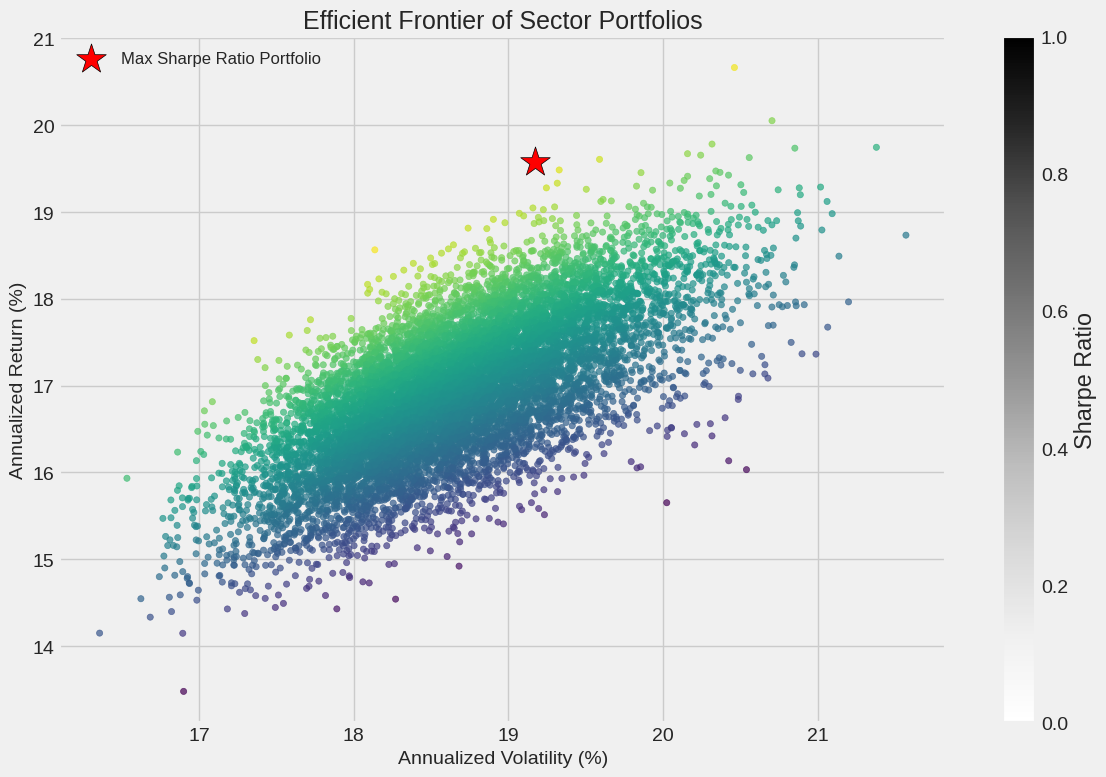

In [26]:
# portfolio_optimizer.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
# Number of random portfolios to simulate
NUM_PORTFOLIOS = 10000
# Risk-free rate for Sharpe Ratio calculation (e.g., return on government bonds)
RISK_FREE_RATE = 0.02

# --- 2. Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_NAME, parse_dates=['Date'])
    print("File loaded. Preparing sector returns data...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Create a pivot table of daily returns for each sector
# This gives a DataFrame where columns are sectors and rows are dates
sector_returns = df.pivot_table(index='Date', columns='Sector', values='Daily_Return')
sector_returns = sector_returns.dropna() # Drop days where not all sectors had data

# Calculate mean daily returns and the covariance matrix, key inputs for the model
mean_returns = sector_returns.mean()
cov_matrix = sector_returns.cov()
num_assets = len(mean_returns)
trading_days = 252

# --- 3. Run Monte Carlo Simulation ---
print(f"Running {NUM_PORTFOLIOS} portfolio simulations...")

# Initialize arrays to store results
results_array = np.zeros((3 + num_assets, NUM_PORTFOLIOS))

for i in range(NUM_PORTFOLIOS):
    # Generate random weights for the portfolio
    weights = np.random.random(num_assets)
    # Normalize weights so they sum to 1
    weights /= np.sum(weights)

    # Calculate portfolio's annualized return, volatility, and Sharpe ratio
    portfolio_return = np.sum(mean_returns * weights) * trading_days
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * trading_days, weights)))
    sharpe_ratio = (portfolio_return - RISK_FREE_RATE) / portfolio_volatility

    # Store results in the array
    results_array[0, i] = portfolio_return
    results_array[1, i] = portfolio_volatility
    results_array[2, i] = sharpe_ratio
    # Store weights for each asset
    for j in range(len(weights)):
        results_array[3 + j, i] = weights[j]

# Convert results array to a DataFrame
results_df = pd.DataFrame(results_array.T, columns=['Return', 'Volatility', 'Sharpe Ratio'] + [sector for sector in sector_returns.columns])

# --- 4. Identify Optimal Portfolio ---
# Locate the portfolio with the highest Sharpe Ratio
max_sharpe_portfolio = results_df.iloc[results_df['Sharpe Ratio'].idxmax()]

print("\n--- Optimal Portfolio (Max Sharpe Ratio) ---")
print(f"Annualized Return: {max_sharpe_portfolio['Return']:.2%}")
print(f"Annualized Volatility: {max_sharpe_portfolio['Volatility']:.2%}")
print(f"Sharpe Ratio: {max_sharpe_portfolio['Sharpe Ratio']:.2f}")
print("\nOptimal Weights:")
print(max_sharpe_portfolio.iloc[3:].apply(lambda x: f'{x:.2%}'))
print("-------------------------------------------\n")

# --- 5. Visualization ---
print("Generating Efficient Frontier plot...")
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))

# Create scatter plot of all simulated portfolios, colored by Sharpe Ratio
plt.scatter(results_df['Volatility'] * 100, results_df['Return'] * 100, c=results_df['Sharpe Ratio'], cmap='viridis', marker='o', s=20, alpha=0.7)

# Highlight the optimal portfolio with a red star
plt.scatter(max_sharpe_portfolio['Volatility'] * 100, max_sharpe_portfolio['Return'] * 100, marker='*', color='r', s=500, edgecolors='black', label='Max Sharpe Ratio Portfolio')

# Formatting
plt.title('Efficient Frontier of Sector Portfolios', fontsize=18)
plt.xlabel('Annualized Volatility (%)', fontsize=14)
plt.ylabel('Annualized Return (%)', fontsize=14)
plt.colorbar(label='Sharpe Ratio')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

In [28]:
# project_black_scholes.py
import pandas as pd
import numpy as np
from scipy.stats import norm

# --- 1. Black-Scholes Formula Definition ---
def black_scholes_call(S, K, T, r, sigma):
    """
    Calculates the price of a European call option.
    S: Current stock price
    K: Option strike price
    T: Time to expiration (in years)
    r: Risk-free interest rate
    sigma: Annualized volatility of the stock
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call_price = (S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    return call_price

# --- 2. Configuration ---
FILE_NAME = '/content/sp500_full_dataset.csv'
TICKER_TO_ANALYZE = 'AAPL'
# Time to expiration in years (e.g., 0.25 = 3 months)
TIME_TO_EXPIRATION = 0.25
# Annual risk-free interest rate (e.g., current Treasury bill rate)
RISK_FREE_RATE = 0.04

# --- 3. Load Data and Get Inputs ---
try:
    df = pd.read_csv(FILE_NAME)
    print("File loaded. Calculating option price...")
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

stock_data = df[df['Ticker'] == TICKER_TO_ANALYZE].copy()
if stock_data.empty:
    print(f"Error: Ticker '{TICKER_TO_ANALYZE}' not found.")
    exit()

# Get the required inputs from the data
# Current Stock Price (S): The last available closing price
current_price = stock_data['Close'].iloc[-1]
# Volatility (sigma): The annualized standard deviation of the stock's daily returns
volatility = stock_data['Daily_Return'].std() * np.sqrt(252)
# Strike Price (K): Let's set it 5% above the current price for this example
strike_price = current_price * 1.05

# --- 4. Calculate and Display the Option Price ---
option_price = black_scholes_call(current_price, strike_price, TIME_TO_EXPIRATION, RISK_FREE_RATE, volatility)

print("\n--- Black-Scholes Call Option Price ---")
print(f"Analytics for Ticker: {TICKER_TO_ANALYZE}")
print("---------------------------------------")
print(f"Current Stock Price (S):     ${current_price:,.2f}")
print(f"Option Strike Price (K):     ${strike_price:,.2f}")
print(f"Time to Expiration (T):      {TIME_TO_EXPIRATION} years")
print(f"Annualized Volatility (σ):   {volatility:.2%}")
print(f"Risk-Free Interest Rate (r): {RISK_FREE_RATE:.2%}")
print("---------------------------------------")
print(f"Theoretical Call Option Price: ${option_price:,.2f}")
print("---------------------------------------\n")

File loaded. Calculating option price...

--- Black-Scholes Call Option Price ---
Analytics for Ticker: AAPL
---------------------------------------
Current Stock Price (S):     $213.25
Option Strike Price (K):     $223.91
Time to Expiration (T):      0.25 years
Annualized Volatility (σ):   29.19%
Risk-Free Interest Rate (r): 4.00%
---------------------------------------
Theoretical Call Option Price: $8.88
---------------------------------------



In [10]:
!pip install pypfopt

ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt
